In [2]:
#import libraries and packages
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras import regularizers


In [3]:
#import data and select feature list
twitter = pd.read_excel("Twitter_NEW.xlsx", sheet_name='Sheet2')
twitter=twitter[['favorite_count','retweet_count','user.followers_count','comments','Estimated manual impact (anna)']]

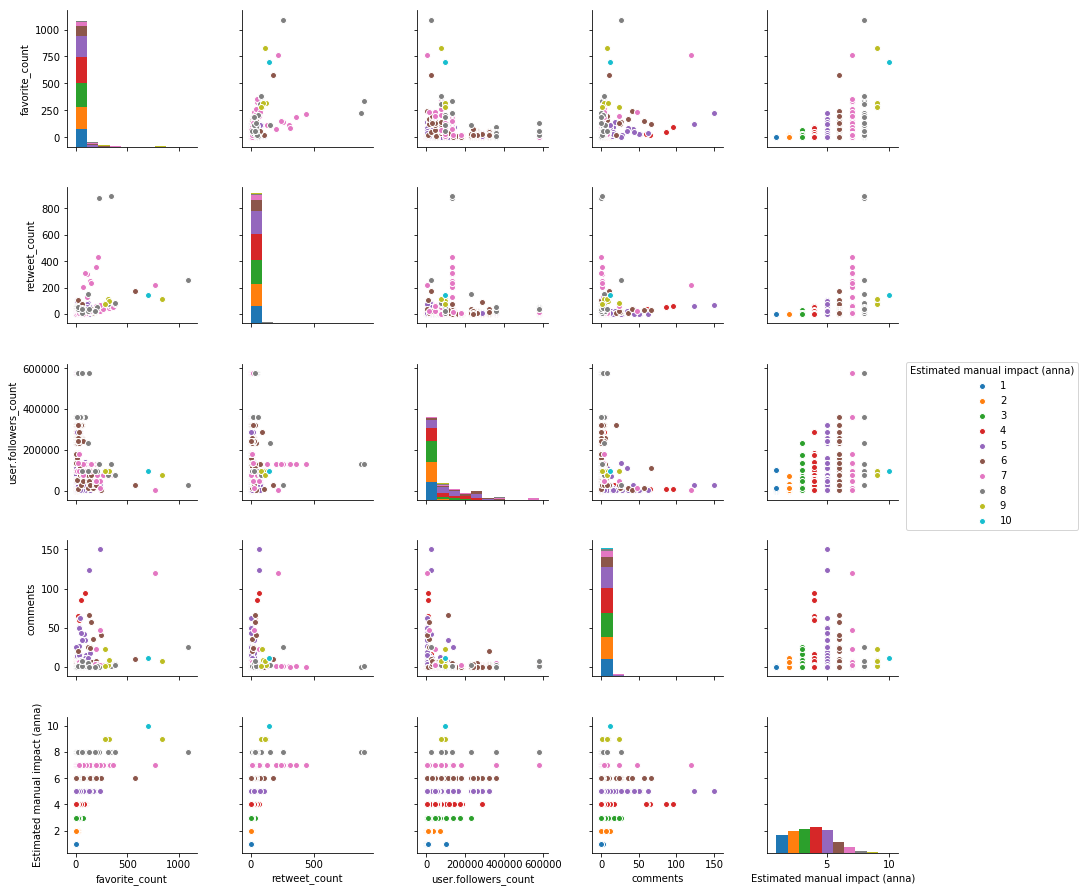

In [4]:
#create pairplot of the feature variables
sns.pairplot(twitter, hue='Estimated manual impact (anna)')

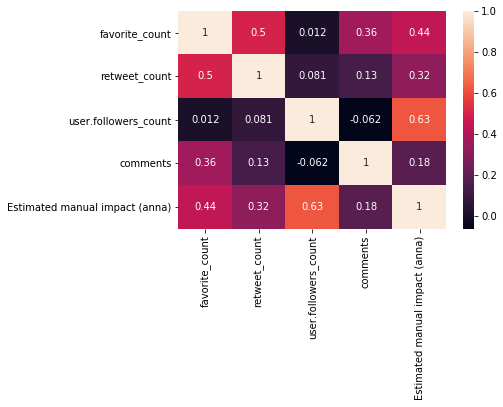

In [5]:
#create correlation plot
sns.heatmap(twitter.corr(), annot = True)

In [6]:
#feature engineering
X = twitter.drop('Estimated manual impact (anna)', axis=1)
X = X.apply(preprocessing.scale, axis=0)
y = twitter['Estimated manual impact (anna)'].values
y_cat = to_categorical(y)
y_cat=y_cat[:,1:]

C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int

In [7]:
#NN Model
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2, random_state= 123)


In [11]:
#--------------------------------------------Grid Search Hyperparameters Tuning --------------------------------------------------#
#Epoch tuning
def create_model():
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model)

epochs = [500, 1000, 1500, 3000]
param_grid = dict(epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
    
#Best: 0.591494 using {'epochs': 1500}
#0.588526 (0.030099) with: {'epochs': 500}
#0.579624 (0.024269) with: {'epochs': 1000}
#0.591494 (0.030679) with: {'epochs': 1500}
#0.544016 (0.032264) with: {'epochs': 3000}


#Optimizer tuning
def create_model(optimizer='adam'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, epochs = 1500)

optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
#Best: 0.644906 using {'optimizer': 'Adam'}
#0.595450 (0.006994) with: {'optimizer': 'SGD'}
#0.625124 (0.029608) with: {'optimizer': 'RMSprop'}
#0.644906 (0.023532) with: {'optimizer': 'Adam'}


#Learning Rate
def create_model(learn_rate=0.009):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1500)
learn_rate = [0.001, 0.009, 0.01, 0.1]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
#Best: 0.639960 using {'learn_rate': 0.001}
#0.639960 (0.013344) with: {'learn_rate': 0.001}
#0.608309 (0.007269) with: {'learn_rate': 0.009}
#0.568744 (0.027871) with: {'learn_rate': 0.01}
#0.176063 (0.008509) with: {'learn_rate': 0.1}

#Weight initializarion tuning
def create_model(init_mode='uniform'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(200, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(200, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1500)
# define the grid search parameters
init_mode = ['uniform', 'glorot_normal', 'normal']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #uniform
    
#Best: 0.657765 using {'init_mode': 'uniform'}
#0.657765 (0.016132) with: {'init_mode': 'uniform'}
#0.649852 (0.006410) with: {'init_mode': 'glorot_normal'}
#0.656775 (0.022900) with: {'init_mode': 'normal'}

#Activation Function Tuning
def create_model(activation='relu'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='uniform', activation=activation))
    model.add(Dense(200, kernel_initializer='uniform', activation=activation))
    model.add(Dense(200, kernel_initializer='uniform', activation=activation))
    model.add(Dense(100, kernel_initializer='uniform', activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1500)
# define the grid search parameters
activation = ['softplus', 'relu', 'tanh', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

#Best: 0.660732 using {'activation': 'softplus'}
#0.660732 (0.009792) with: {'activation': 'softplus'}
#0.648863 (0.015387) with: {'activation': 'relu'}
#0.608309 (0.027518) with: {'activation': 'tanh'}
#0.462908 (0.034943) with: {'activation': 'linear'}

#Regularization penalty Tuning
from keras import regularizers
def create_model(beta=0.0001):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(200, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(200, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(100, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1500)
# define the grid search parameters
beta = [0.0001, 0.001, 0.01]
param_grid = dict(beta=beta)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#Best: 0.603363 using {'beta': 0.0001}
#0.603363 (0.010925) with: {'beta': 0.0001}
#0.498516 (0.014738) with: {'beta': 0.001}
#0.191889 (0.019584) with: {'beta': 0.01}

#Number of hidden Units tuning
def create_model(neurons=101):
    model  = Sequential ()
    model.add(Dense(neurons, input_shape=(4,), kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons-100, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1500)
# define the grid search parameters
neurons = [200, 300, 400]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Best: 0.609298 using {'neurons': 200}
#0.609298 (0.014197) with: {'neurons': 200}
#0.552918 (0.033073) with: {'neurons': 300}
#0.544016 (0.024509) with: {'neurons': 400}

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] neurons=200 .....................................................
Epoch 1/1500
674/674 [==============================] - 1s 1ms/step - loss: 2.0859 - acc: 0.1528
Epoch 2/1500
674/674 [==============================] - 0s 258us/step - loss: 2.0127 - acc: 0.1736
Epoch 3/1500
674/674 [==============================] - 0s 258us/step - loss: 1.9933 - acc: 0.1573
Epoch 4/1500
674/674 [==============================] - 0s 245us/step - loss: 1.9873 - acc: 0.1751
Epoch 5/1500
674/674 [==============================] - 0s 216us/step - loss: 1.9831 - acc: 0.1825
Epoch 6/1500
674/674 [==============================] - 0s 181us/step - loss: 1.9745 - acc: 0.1677
Epoch 7/1500
674/674 [==============================] - 0s 197us/step - loss: 1.9529 - acc: 0.1677
Epoch 8/1500
674/674 [==============================] - 0s 173us/step - loss: 1.8650 - acc: 0.1558
Epoch 9/1500
674/674 [==============================] - 0s 211us/step - loss: 1.

674/674 [==============================] - 0s 199us/step - loss: 1.1166 - acc: 0.5252
Epoch 162/1500
674/674 [==============================] - 0s 199us/step - loss: 1.0931 - acc: 0.5341
Epoch 163/1500
674/674 [==============================] - 0s 185us/step - loss: 1.0916 - acc: 0.5534
Epoch 164/1500
674/674 [==============================] - 0s 185us/step - loss: 1.1211 - acc: 0.5297
Epoch 165/1500
674/674 [==============================] - 0s 176us/step - loss: 1.1115 - acc: 0.5297
Epoch 166/1500
674/674 [==============================] - 0s 196us/step - loss: 1.1077 - acc: 0.4941
Epoch 167/1500
674/674 [==============================] - 0s 178us/step - loss: 1.1032 - acc: 0.5312
Epoch 168/1500
674/674 [==============================] - 0s 175us/step - loss: 1.1035 - acc: 0.5386
Epoch 169/1500
674/674 [==============================] - 0s 191us/step - loss: 1.1013 - acc: 0.5312
Epoch 170/1500
674/674 [==============================] - 0s 179us/step - loss: 1.0907 - acc: 0.5608
Epoch

Epoch 323/1500
674/674 [==============================] - 0s 187us/step - loss: 1.0545 - acc: 0.5697
Epoch 324/1500
674/674 [==============================] - 0s 205us/step - loss: 1.0367 - acc: 0.5742
Epoch 325/1500
674/674 [==============================] - 0s 168us/step - loss: 1.0610 - acc: 0.5623
Epoch 326/1500
674/674 [==============================] - 0s 178us/step - loss: 1.0372 - acc: 0.5697
Epoch 327/1500
674/674 [==============================] - 0s 188us/step - loss: 1.0369 - acc: 0.5801
Epoch 328/1500
674/674 [==============================] - 0s 193us/step - loss: 1.0439 - acc: 0.5905
Epoch 329/1500
674/674 [==============================] - 0s 194us/step - loss: 1.0290 - acc: 0.5786
Epoch 330/1500
674/674 [==============================] - 0s 178us/step - loss: 1.0999 - acc: 0.5549
Epoch 331/1500
674/674 [==============================] - 0s 185us/step - loss: 1.0457 - acc: 0.5816
Epoch 332/1500
674/674 [==============================] - 0s 181us/step - loss: 1.0394 - ac

674/674 [==============================] - 0s 197us/step - loss: 0.9921 - acc: 0.5964
Epoch 484/1500
674/674 [==============================] - 0s 219us/step - loss: 0.9921 - acc: 0.5935
Epoch 485/1500
674/674 [==============================] - 0s 197us/step - loss: 0.9822 - acc: 0.5964
Epoch 486/1500
674/674 [==============================] - 0s 211us/step - loss: 1.0310 - acc: 0.6142
Epoch 487/1500
674/674 [==============================] - 0s 206us/step - loss: 1.0161 - acc: 0.5920
Epoch 488/1500
674/674 [==============================] - 0s 188us/step - loss: 1.0645 - acc: 0.5742
Epoch 489/1500
674/674 [==============================] - 0s 215us/step - loss: 1.0013 - acc: 0.5846
Epoch 490/1500
674/674 [==============================] - 0s 190us/step - loss: 0.9770 - acc: 0.6276
Epoch 491/1500
674/674 [==============================] - 0s 209us/step - loss: 0.9870 - acc: 0.5950
Epoch 492/1500
674/674 [==============================] - 0s 217us/step - loss: 0.9735 - acc: 0.6128
Epoch

674/674 [==============================] - 0s 202us/step - loss: 0.9731 - acc: 0.6024
Epoch 564/1500
674/674 [==============================] - 0s 215us/step - loss: 1.0096 - acc: 0.5727
Epoch 565/1500
674/674 [==============================] - 0s 176us/step - loss: 0.9844 - acc: 0.5831
Epoch 566/1500
674/674 [==============================] - 0s 187us/step - loss: 0.9796 - acc: 0.5920
Epoch 567/1500
674/674 [==============================] - 0s 209us/step - loss: 0.9615 - acc: 0.6083
Epoch 568/1500
674/674 [==============================] - 0s 206us/step - loss: 0.9535 - acc: 0.6128
Epoch 569/1500
674/674 [==============================] - 0s 184us/step - loss: 0.9874 - acc: 0.5846
Epoch 570/1500
674/674 [==============================] - 0s 182us/step - loss: 0.9606 - acc: 0.6083
Epoch 571/1500
674/674 [==============================] - 0s 199us/step - loss: 0.9474 - acc: 0.6231
Epoch 572/1500
674/674 [==============================] - 0s 205us/step - loss: 0.9739 - acc: 0.6142
Epoch

674/674 [==============================] - 0s 178us/step - loss: 0.8865 - acc: 0.6395
Epoch 725/1500
674/674 [==============================] - 0s 212us/step - loss: 0.8789 - acc: 0.6291
Epoch 726/1500
674/674 [==============================] - 0s 187us/step - loss: 0.8845 - acc: 0.6573
Epoch 727/1500
674/674 [==============================] - 0s 211us/step - loss: 0.8816 - acc: 0.6128
Epoch 728/1500
674/674 [==============================] - 0s 212us/step - loss: 0.9053 - acc: 0.6231
Epoch 729/1500
674/674 [==============================] - 0s 219us/step - loss: 0.8776 - acc: 0.6335
Epoch 730/1500
674/674 [==============================] - 0s 215us/step - loss: 0.8755 - acc: 0.6543
Epoch 731/1500
674/674 [==============================] - 0s 212us/step - loss: 0.8645 - acc: 0.6499
Epoch 732/1500
674/674 [==============================] - 0s 181us/step - loss: 0.8887 - acc: 0.6320
Epoch 733/1500
674/674 [==============================] - 0s 197us/step - loss: 0.9217 - acc: 0.6202
Epoch

Epoch 886/1500
674/674 [==============================] - 0s 191us/step - loss: 0.8564 - acc: 0.6632 0s - loss: 0.8586 - acc: 0.661
Epoch 887/1500
674/674 [==============================] - 0s 182us/step - loss: 0.8205 - acc: 0.6632
Epoch 888/1500
674/674 [==============================] - 0s 182us/step - loss: 0.8719 - acc: 0.6588
Epoch 889/1500
674/674 [==============================] - 0s 196us/step - loss: 0.8574 - acc: 0.6513
Epoch 890/1500
674/674 [==============================] - 0s 168us/step - loss: 0.8465 - acc: 0.6543
Epoch 891/1500
674/674 [==============================] - 0s 187us/step - loss: 0.8268 - acc: 0.6736
Epoch 892/1500
674/674 [==============================] - 0s 182us/step - loss: 0.8014 - acc: 0.6810
Epoch 893/1500
674/674 [==============================] - 0s 194us/step - loss: 0.7988 - acc: 0.6721
Epoch 894/1500
674/674 [==============================] - 0s 178us/step - loss: 0.8101 - acc: 0.6780
Epoch 895/1500
674/674 [==============================] - 0s

674/674 [==============================] - 0s 197us/step - loss: 0.8126 - acc: 0.6662
Epoch 1047/1500
674/674 [==============================] - 0s 193us/step - loss: 0.8044 - acc: 0.6691
Epoch 1048/1500
674/674 [==============================] - 0s 179us/step - loss: 0.7563 - acc: 0.6825 0s - loss: 0.7642 - acc: 0.678
Epoch 1049/1500
674/674 [==============================] - 0s 218us/step - loss: 0.7703 - acc: 0.7077
Epoch 1050/1500
674/674 [==============================] - 0s 172us/step - loss: 0.7505 - acc: 0.7003
Epoch 1051/1500
674/674 [==============================] - 0s 182us/step - loss: 0.7622 - acc: 0.7047
Epoch 1052/1500
674/674 [==============================] - 0s 190us/step - loss: 0.7679 - acc: 0.6780
Epoch 1053/1500
674/674 [==============================] - 0s 216us/step - loss: 0.7715 - acc: 0.6914
Epoch 1054/1500
674/674 [==============================] - 0s 191us/step - loss: 0.7808 - acc: 0.6914
Epoch 1055/1500
674/674 [==============================] - 0s 200us

674/674 [==============================] - 0s 216us/step - loss: 0.7164 - acc: 0.7196
Epoch 1206/1500
674/674 [==============================] - 0s 211us/step - loss: 0.7613 - acc: 0.6958
Epoch 1207/1500
674/674 [==============================] - 0s 202us/step - loss: 0.7245 - acc: 0.7062
Epoch 1208/1500
674/674 [==============================] - 0s 212us/step - loss: 0.7300 - acc: 0.7196
Epoch 1209/1500
674/674 [==============================] - 0s 200us/step - loss: 0.7561 - acc: 0.7136
Epoch 1210/1500
674/674 [==============================] - 0s 212us/step - loss: 0.7153 - acc: 0.7300
Epoch 1211/1500
674/674 [==============================] - 0s 209us/step - loss: 0.6884 - acc: 0.7329
Epoch 1212/1500
674/674 [==============================] - 0s 221us/step - loss: 0.8479 - acc: 0.6691
Epoch 1213/1500
674/674 [==============================] - 0s 219us/step - loss: 0.7228 - acc: 0.7107
Epoch 1214/1500
674/674 [==============================] - 0s 225us/step - loss: 0.7108 - acc: 0.7

674/674 [==============================] - 0s 205us/step - loss: 0.6825 - acc: 0.7507
Epoch 1365/1500
674/674 [==============================] - 0s 206us/step - loss: 0.6807 - acc: 0.7300
Epoch 1366/1500
674/674 [==============================] - 0s 202us/step - loss: 0.6620 - acc: 0.7300
Epoch 1367/1500
674/674 [==============================] - 0s 203us/step - loss: 0.6112 - acc: 0.7760
Epoch 1368/1500
674/674 [==============================] - 0s 203us/step - loss: 0.6550 - acc: 0.7448
Epoch 1369/1500
674/674 [==============================] - 0s 197us/step - loss: 0.6117 - acc: 0.7611
Epoch 1370/1500
674/674 [==============================] - 0s 211us/step - loss: 0.6103 - acc: 0.7834
Epoch 1371/1500
674/674 [==============================] - 0s 202us/step - loss: 0.6085 - acc: 0.7715
Epoch 1372/1500
674/674 [==============================] - 0s 196us/step - loss: 0.6184 - acc: 0.7700
Epoch 1373/1500
674/674 [==============================] - 0s 209us/step - loss: 0.6402 - acc: 0.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 1ms/step - loss: 2.1482 - acc: 0.1766
Epoch 2/1500
674/674 [==============================] - 0s 228us/step - loss: 2.0100 - acc: 0.1647
Epoch 3/1500
674/674 [==============================] - 0s 197us/step - loss: 1.9994 - acc: 0.1662
Epoch 4/1500
674/674 [==============================] - 0s 199us/step - loss: 1.9899 - acc: 0.1543
Epoch 5/1500
674/674 [==============================] - 0s 222us/step - loss: 1.9933 - acc: 0.1766
Epoch 6/1500
674/674 [==============================] - 0s 228us/step - loss: 1.9906 - acc: 0.1142
Epoch 7/1500
674/674 [==============================] - 0s 191us/step - loss: 1.9638 - acc: 0.1810
Epoch 8/1500
674/674 [==============================] - 0s 200us/step - loss: 1.8994 - acc: 0.2018
Epoch 9/1500
674/674 [==============================] - 0s 230us/step - loss: 1.6165 - acc: 0.3205
Epoch 10/1500
674/674 [==============================] - 0s 209us/step - loss: 1.4670 - acc: 0.3338
Epoch 11/15

674/674 [==============================] - 0s 196us/step - loss: 1.0853 - acc: 0.5297
Epoch 164/1500
674/674 [==============================] - 0s 200us/step - loss: 1.0895 - acc: 0.5193
Epoch 165/1500
674/674 [==============================] - 0s 222us/step - loss: 1.0902 - acc: 0.5490
Epoch 166/1500
674/674 [==============================] - 0s 214us/step - loss: 1.0904 - acc: 0.5282
Epoch 167/1500
674/674 [==============================] - 0s 211us/step - loss: 1.0929 - acc: 0.5371
Epoch 168/1500
674/674 [==============================] - 0s 209us/step - loss: 1.1044 - acc: 0.5119
Epoch 169/1500
674/674 [==============================] - 0s 194us/step - loss: 1.1078 - acc: 0.5163
Epoch 170/1500
674/674 [==============================] - 0s 214us/step - loss: 1.1063 - acc: 0.5089
Epoch 171/1500
674/674 [==============================] - 0s 202us/step - loss: 1.0795 - acc: 0.5386
Epoch 172/1500
674/674 [==============================] - 0s 193us/step - loss: 1.0926 - acc: 0.5089
Epoch

674/674 [==============================] - 0s 205us/step - loss: 1.1143 - acc: 0.5282
Epoch 325/1500
674/674 [==============================] - 0s 240us/step - loss: 1.0763 - acc: 0.5282
Epoch 326/1500
674/674 [==============================] - 0s 206us/step - loss: 1.0565 - acc: 0.5534
Epoch 327/1500
674/674 [==============================] - 0s 217us/step - loss: 1.0511 - acc: 0.5564
Epoch 328/1500
674/674 [==============================] - 0s 215us/step - loss: 1.0591 - acc: 0.5579
Epoch 329/1500
674/674 [==============================] - 0s 224us/step - loss: 1.0879 - acc: 0.5519
Epoch 330/1500
674/674 [==============================] - 0s 233us/step - loss: 1.0433 - acc: 0.5757
Epoch 331/1500
674/674 [==============================] - 0s 209us/step - loss: 1.0993 - acc: 0.5326
Epoch 332/1500
674/674 [==============================] - 0s 216us/step - loss: 1.0719 - acc: 0.5460
Epoch 333/1500
674/674 [==============================] - 0s 221us/step - loss: 1.0456 - acc: 0.5727
Epoch

Epoch 405/1500
674/674 [==============================] - 0s 200us/step - loss: 1.0482 - acc: 0.5475
Epoch 406/1500
674/674 [==============================] - 0s 202us/step - loss: 1.0684 - acc: 0.5534
Epoch 407/1500
674/674 [==============================] - 0s 208us/step - loss: 1.0460 - acc: 0.5757
Epoch 408/1500
674/674 [==============================] - 0s 203us/step - loss: 1.0724 - acc: 0.5237
Epoch 409/1500
674/674 [==============================] - 0s 193us/step - loss: 1.1212 - acc: 0.5282
Epoch 410/1500
674/674 [==============================] - 0s 199us/step - loss: 1.0593 - acc: 0.5430
Epoch 411/1500
674/674 [==============================] - 0s 197us/step - loss: 1.0300 - acc: 0.5757
Epoch 412/1500
674/674 [==============================] - 0s 211us/step - loss: 1.0618 - acc: 0.5742
Epoch 413/1500
674/674 [==============================] - 0s 194us/step - loss: 1.0313 - acc: 0.5668
Epoch 414/1500
674/674 [==============================] - 0s 205us/step - loss: 1.0439 - ac

674/674 [==============================] - 0s 203us/step - loss: 0.9989 - acc: 0.6009
Epoch 487/1500
674/674 [==============================] - 0s 193us/step - loss: 1.0062 - acc: 0.5964
Epoch 488/1500
674/674 [==============================] - 0s 190us/step - loss: 1.0332 - acc: 0.5890
Epoch 489/1500
674/674 [==============================] - 0s 197us/step - loss: 1.0255 - acc: 0.5831
Epoch 490/1500
674/674 [==============================] - 0s 203us/step - loss: 1.0150 - acc: 0.5682
Epoch 491/1500
674/674 [==============================] - 0s 199us/step - loss: 1.0342 - acc: 0.5638
Epoch 492/1500
674/674 [==============================] - 0s 206us/step - loss: 0.9984 - acc: 0.5979
Epoch 493/1500
674/674 [==============================] - 0s 194us/step - loss: 1.0117 - acc: 0.5682
Epoch 494/1500
674/674 [==============================] - 0s 215us/step - loss: 1.0023 - acc: 0.6083
Epoch 495/1500
674/674 [==============================] - 0s 200us/step - loss: 1.0008 - acc: 0.5831
Epoch

674/674 [==============================] - 0s 166us/step - loss: 0.9560 - acc: 0.6128
Epoch 648/1500
674/674 [==============================] - 0s 171us/step - loss: 0.9447 - acc: 0.6320
Epoch 649/1500
674/674 [==============================] - 0s 185us/step - loss: 0.9458 - acc: 0.6380
Epoch 650/1500
674/674 [==============================] - 0s 216us/step - loss: 1.0075 - acc: 0.5727
Epoch 651/1500
674/674 [==============================] - 0s 200us/step - loss: 0.9421 - acc: 0.6172
Epoch 652/1500
674/674 [==============================] - 0s 208us/step - loss: 0.9215 - acc: 0.6291
Epoch 653/1500
674/674 [==============================] - 0s 205us/step - loss: 0.9249 - acc: 0.6454
Epoch 654/1500
674/674 [==============================] - 0s 206us/step - loss: 0.9841 - acc: 0.6172
Epoch 655/1500
674/674 [==============================] - 0s 196us/step - loss: 0.9549 - acc: 0.6217
Epoch 656/1500
674/674 [==============================] - 0s 203us/step - loss: 0.9278 - acc: 0.6380
Epoch

674/674 [==============================] - 0s 199us/step - loss: 0.8590 - acc: 0.6588
Epoch 809/1500
674/674 [==============================] - 0s 200us/step - loss: 0.9823 - acc: 0.6528
Epoch 810/1500
674/674 [==============================] - 0s 196us/step - loss: 0.9445 - acc: 0.6454
Epoch 811/1500
674/674 [==============================] - 0s 208us/step - loss: 0.9429 - acc: 0.6231
Epoch 812/1500
674/674 [==============================] - 0s 215us/step - loss: 0.8863 - acc: 0.6439
Epoch 813/1500
674/674 [==============================] - 0s 193us/step - loss: 0.8561 - acc: 0.6573
Epoch 814/1500
674/674 [==============================] - 0s 206us/step - loss: 0.8690 - acc: 0.6795
Epoch 815/1500
674/674 [==============================] - 0s 199us/step - loss: 0.8696 - acc: 0.6409
Epoch 816/1500
674/674 [==============================] - 0s 215us/step - loss: 0.8666 - acc: 0.6513
Epoch 817/1500
674/674 [==============================] - 0s 211us/step - loss: 0.8602 - acc: 0.6602
Epoch

Epoch 970/1500
674/674 [==============================] - 0s 203us/step - loss: 0.7978 - acc: 0.6795
Epoch 971/1500
674/674 [==============================] - 0s 208us/step - loss: 0.8098 - acc: 0.6766
Epoch 972/1500
674/674 [==============================] - 0s 212us/step - loss: 0.8083 - acc: 0.6780
Epoch 973/1500
674/674 [==============================] - 0s 205us/step - loss: 0.9080 - acc: 0.6602
Epoch 974/1500
674/674 [==============================] - 0s 211us/step - loss: 0.8532 - acc: 0.6632
Epoch 975/1500
674/674 [==============================] - 0s 200us/step - loss: 0.7945 - acc: 0.6810
Epoch 976/1500
674/674 [==============================] - 0s 208us/step - loss: 0.8629 - acc: 0.6484
Epoch 977/1500
674/674 [==============================] - 0s 212us/step - loss: 0.8182 - acc: 0.6795
Epoch 978/1500
674/674 [==============================] - 0s 193us/step - loss: 0.8265 - acc: 0.6706
Epoch 979/1500
674/674 [==============================] - 0s 200us/step - loss: 0.8214 - ac

674/674 [==============================] - 0s 194us/step - loss: 0.7444 - acc: 0.7092
Epoch 1131/1500
674/674 [==============================] - 0s 214us/step - loss: 0.7863 - acc: 0.6780
Epoch 1132/1500
674/674 [==============================] - 0s 205us/step - loss: 0.7640 - acc: 0.7033
Epoch 1133/1500
674/674 [==============================] - 0s 209us/step - loss: 0.7117 - acc: 0.7211
Epoch 1134/1500
674/674 [==============================] - 0s 203us/step - loss: 0.7019 - acc: 0.7300
Epoch 1135/1500
674/674 [==============================] - 0s 218us/step - loss: 0.7145 - acc: 0.7092
Epoch 1136/1500
674/674 [==============================] - 0s 205us/step - loss: 0.7284 - acc: 0.7270
Epoch 1137/1500
674/674 [==============================] - 0s 208us/step - loss: 0.7205 - acc: 0.7136
Epoch 1138/1500
674/674 [==============================] - 0s 215us/step - loss: 0.7505 - acc: 0.6869
Epoch 1139/1500
674/674 [==============================] - 0s 208us/step - loss: 0.7432 - acc: 0.7

674/674 [==============================] - 0s 208us/step - loss: 0.7094 - acc: 0.7300
Epoch 1291/1500
674/674 [==============================] - 0s 219us/step - loss: 0.6835 - acc: 0.7151
Epoch 1292/1500
674/674 [==============================] - 0s 222us/step - loss: 0.6606 - acc: 0.7478
Epoch 1293/1500
674/674 [==============================] - 0s 212us/step - loss: 0.6548 - acc: 0.7463
Epoch 1294/1500
674/674 [==============================] - 0s 218us/step - loss: 0.7207 - acc: 0.7033
Epoch 1295/1500
674/674 [==============================] - 0s 236us/step - loss: 0.6839 - acc: 0.7255
Epoch 1296/1500
674/674 [==============================] - 0s 214us/step - loss: 0.7317 - acc: 0.7226
Epoch 1297/1500
674/674 [==============================] - 0s 217us/step - loss: 0.6789 - acc: 0.7389
Epoch 1298/1500
674/674 [==============================] - 0s 215us/step - loss: 0.6617 - acc: 0.7404
Epoch 1299/1500
674/674 [==============================] - 0s 222us/step - loss: 0.6822 - acc: 0.7

674/674 [==============================] - 0s 219us/step - loss: 0.6522 - acc: 0.7433
Epoch 1371/1500
674/674 [==============================] - 0s 224us/step - loss: 0.7461 - acc: 0.7270
Epoch 1372/1500
674/674 [==============================] - 0s 224us/step - loss: 0.6797 - acc: 0.7478
Epoch 1373/1500
674/674 [==============================] - 0s 214us/step - loss: 0.7371 - acc: 0.7226
Epoch 1374/1500
674/674 [==============================] - 0s 225us/step - loss: 0.6704 - acc: 0.7359
Epoch 1375/1500
674/674 [==============================] - 0s 227us/step - loss: 0.6555 - acc: 0.7315
Epoch 1376/1500
674/674 [==============================] - 0s 216us/step - loss: 0.6696 - acc: 0.7433
Epoch 1377/1500
674/674 [==============================] - 0s 212us/step - loss: 0.6729 - acc: 0.7315
Epoch 1378/1500
674/674 [==============================] - 0s 221us/step - loss: 0.7176 - acc: 0.7181
Epoch 1379/1500
674/674 [==============================] - 0s 206us/step - loss: 0.8215 - acc: 0.6

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.0min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 1ms/step - loss: 2.0840 - acc: 0.1721
Epoch 2/1500
674/674 [==============================] - 0s 211us/step - loss: 1.9849 - acc: 0.1766
Epoch 3/1500
674/674 [==============================] - 0s 191us/step - loss: 1.9943 - acc: 0.1751
Epoch 4/1500
674/674 [==============================] - 0s 208us/step - loss: 1.9837 - acc: 0.1914
Epoch 5/1500
674/674 [==============================] - 0s 205us/step - loss: 1.9635 - acc: 0.1899
Epoch 6/1500
674/674 [==============================] - 0s 212us/step - loss: 1.9554 - acc: 0.1914
Epoch 7/1500
674/674 [==============================] - 0s 202us/step - loss: 1.8940 - acc: 0.1810
Epoch 8/1500
674/674 [==============================] - 0s 200us/step - loss: 1.7408 - acc: 0.2730
Epoch 9/1500
674/674 [==============================] - 0s 218us/step - loss: 1.6607 - acc: 0.2552
Epoch 10/1500
674/674 [==============================] - 0s 202us/step - loss: 1.5825 - acc: 0.3205
Epoch 11/15

674/674 [==============================] - 0s 206us/step - loss: 1.1577 - acc: 0.4837
Epoch 84/1500
674/674 [==============================] - 0s 203us/step - loss: 1.1797 - acc: 0.4718
Epoch 85/1500
674/674 [==============================] - 0s 200us/step - loss: 1.2075 - acc: 0.4599
Epoch 86/1500
674/674 [==============================] - 0s 196us/step - loss: 1.2418 - acc: 0.4614
Epoch 87/1500
674/674 [==============================] - 0s 242us/step - loss: 1.2157 - acc: 0.4570
Epoch 88/1500
674/674 [==============================] - 0s 203us/step - loss: 1.1514 - acc: 0.4807
Epoch 89/1500
674/674 [==============================] - 0s 199us/step - loss: 1.1566 - acc: 0.4792
Epoch 90/1500
674/674 [==============================] - 0s 212us/step - loss: 1.1717 - acc: 0.4496
Epoch 91/1500
674/674 [==============================] - 0s 196us/step - loss: 1.1731 - acc: 0.4763
Epoch 92/1500
674/674 [==============================] - 0s 193us/step - loss: 1.1642 - acc: 0.5104
Epoch 93/1500


Epoch 245/1500
674/674 [==============================] - 0s 206us/step - loss: 1.1403 - acc: 0.4941
Epoch 246/1500
674/674 [==============================] - 0s 215us/step - loss: 1.1376 - acc: 0.4926
Epoch 247/1500
674/674 [==============================] - 0s 208us/step - loss: 1.1165 - acc: 0.5089
Epoch 248/1500
674/674 [==============================] - 0s 224us/step - loss: 1.1184 - acc: 0.5237
Epoch 249/1500
674/674 [==============================] - 0s 199us/step - loss: 1.1403 - acc: 0.4985
Epoch 250/1500
674/674 [==============================] - 0s 209us/step - loss: 1.1165 - acc: 0.5163
Epoch 251/1500
674/674 [==============================] - 0s 196us/step - loss: 1.1223 - acc: 0.5223
Epoch 252/1500
674/674 [==============================] - 0s 202us/step - loss: 1.1566 - acc: 0.4941
Epoch 253/1500
674/674 [==============================] - 0s 188us/step - loss: 1.1208 - acc: 0.5148
Epoch 254/1500
674/674 [==============================] - 0s 184us/step - loss: 1.1339 - ac

674/674 [==============================] - 0s 181us/step - loss: 1.0693 - acc: 0.5549
Epoch 408/1500
674/674 [==============================] - 0s 181us/step - loss: 1.0910 - acc: 0.5163
Epoch 409/1500
674/674 [==============================] - 0s 184us/step - loss: 1.0871 - acc: 0.5415
Epoch 410/1500
674/674 [==============================] - 0s 178us/step - loss: 1.0778 - acc: 0.5401
Epoch 411/1500
674/674 [==============================] - 0s 209us/step - loss: 1.0586 - acc: 0.5312
Epoch 412/1500
674/674 [==============================] - 0s 169us/step - loss: 1.0652 - acc: 0.5401
Epoch 413/1500
674/674 [==============================] - 0s 178us/step - loss: 1.0552 - acc: 0.5415
Epoch 414/1500
674/674 [==============================] - 0s 173us/step - loss: 1.0603 - acc: 0.5504
Epoch 415/1500
674/674 [==============================] - 0s 176us/step - loss: 1.0598 - acc: 0.5460
Epoch 416/1500
674/674 [==============================] - 0s 191us/step - loss: 1.0695 - acc: 0.5312
Epoch

674/674 [==============================] - 0s 187us/step - loss: 1.0395 - acc: 0.5326
Epoch 570/1500
674/674 [==============================] - 0s 178us/step - loss: 1.0129 - acc: 0.5623
Epoch 571/1500
674/674 [==============================] - 0s 203us/step - loss: 1.0043 - acc: 0.5712
Epoch 572/1500
674/674 [==============================] - 0s 165us/step - loss: 1.0054 - acc: 0.5579
Epoch 573/1500
674/674 [==============================] - 0s 168us/step - loss: 1.0122 - acc: 0.5697
Epoch 574/1500
674/674 [==============================] - 0s 166us/step - loss: 1.0183 - acc: 0.5608
Epoch 575/1500
674/674 [==============================] - 0s 184us/step - loss: 0.9999 - acc: 0.5668
Epoch 576/1500
674/674 [==============================] - 0s 181us/step - loss: 0.9946 - acc: 0.5638
Epoch 577/1500
674/674 [==============================] - 0s 172us/step - loss: 1.0045 - acc: 0.5608
Epoch 578/1500
674/674 [==============================] - 0s 175us/step - loss: 1.0097 - acc: 0.5490
Epoch

Epoch 730/1500
674/674 [==============================] - 0s 187us/step - loss: 0.9670 - acc: 0.5979
Epoch 731/1500
674/674 [==============================] - 0s 199us/step - loss: 1.0036 - acc: 0.5742
Epoch 732/1500
674/674 [==============================] - 0s 175us/step - loss: 0.9623 - acc: 0.6217
Epoch 733/1500
674/674 [==============================] - 0s 172us/step - loss: 0.9410 - acc: 0.6128
Epoch 734/1500
674/674 [==============================] - 0s 176us/step - loss: 0.9263 - acc: 0.6291 0s - loss: 0.9314 - acc: 0.59
Epoch 735/1500
674/674 [==============================] - 0s 176us/step - loss: 0.9543 - acc: 0.6157 0s - loss: 0.9529 - acc: 0.616
Epoch 736/1500
674/674 [==============================] - 0s 171us/step - loss: 0.9707 - acc: 0.6009
Epoch 737/1500
674/674 [==============================] - 0s 175us/step - loss: 0.9481 - acc: 0.6128
Epoch 738/1500
674/674 [==============================] - 0s 179us/step - loss: 0.9641 - acc: 0.6246
Epoch 739/1500
674/674 [======

674/674 [==============================] - 0s 211us/step - loss: 0.8545 - acc: 0.6810
Epoch 891/1500
674/674 [==============================] - 0s 193us/step - loss: 0.9272 - acc: 0.6335
Epoch 892/1500
674/674 [==============================] - 0s 199us/step - loss: 0.9865 - acc: 0.6217
Epoch 893/1500
674/674 [==============================] - 0s 187us/step - loss: 0.9405 - acc: 0.6588
Epoch 894/1500
674/674 [==============================] - 0s 197us/step - loss: 1.0069 - acc: 0.6098
Epoch 895/1500
674/674 [==============================] - 0s 211us/step - loss: 0.9409 - acc: 0.6172
Epoch 896/1500
674/674 [==============================] - 0s 193us/step - loss: 0.8941 - acc: 0.6306
Epoch 897/1500
674/674 [==============================] - 0s 185us/step - loss: 0.9114 - acc: 0.6350
Epoch 898/1500
674/674 [==============================] - 0s 187us/step - loss: 0.8980 - acc: 0.6513
Epoch 899/1500
674/674 [==============================] - 0s 194us/step - loss: 0.8596 - acc: 0.6469
Epoch

674/674 [==============================] - 0s 188us/step - loss: 0.7751 - acc: 0.7166
Epoch 1050/1500
674/674 [==============================] - 0s 166us/step - loss: 0.8064 - acc: 0.7003
Epoch 1051/1500
674/674 [==============================] - 0s 185us/step - loss: 0.9194 - acc: 0.6632
Epoch 1052/1500
674/674 [==============================] - 0s 182us/step - loss: 0.8063 - acc: 0.6840
Epoch 1053/1500
674/674 [==============================] - 0s 173us/step - loss: 0.8096 - acc: 0.6914
Epoch 1054/1500
674/674 [==============================] - 0s 173us/step - loss: 0.7848 - acc: 0.7003
Epoch 1055/1500
674/674 [==============================] - 0s 185us/step - loss: 0.7627 - acc: 0.7166
Epoch 1056/1500
674/674 [==============================] - 0s 182us/step - loss: 0.7981 - acc: 0.7062
Epoch 1057/1500
674/674 [==============================] - 0s 165us/step - loss: 0.8134 - acc: 0.6899
Epoch 1058/1500
674/674 [==============================] - 0s 179us/step - loss: 0.9305 - acc: 0.6

674/674 [==============================] - 0s 181us/step - loss: 0.8040 - acc: 0.7329
Epoch 1209/1500
674/674 [==============================] - 0s 188us/step - loss: 0.7811 - acc: 0.7062
Epoch 1210/1500
674/674 [==============================] - 0s 181us/step - loss: 0.7753 - acc: 0.7181
Epoch 1211/1500
674/674 [==============================] - 0s 176us/step - loss: 0.7354 - acc: 0.7433 0s - loss: 0.7373 - acc: 0.742
Epoch 1212/1500
674/674 [==============================] - 0s 173us/step - loss: 0.7015 - acc: 0.7285
Epoch 1213/1500
674/674 [==============================] - 0s 181us/step - loss: 0.7243 - acc: 0.7329
Epoch 1214/1500
674/674 [==============================] - 0s 181us/step - loss: 0.7297 - acc: 0.7285
Epoch 1215/1500
674/674 [==============================] - 0s 178us/step - loss: 0.7220 - acc: 0.7240
Epoch 1216/1500
674/674 [==============================] - 0s 179us/step - loss: 0.7230 - acc: 0.7151
Epoch 1217/1500
674/674 [==============================] - 0s 169us

674/674 [==============================] - 0s 197us/step - loss: 0.7258 - acc: 0.7374
Epoch 1369/1500
674/674 [==============================] - 0s 202us/step - loss: 0.6870 - acc: 0.7448
Epoch 1370/1500
674/674 [==============================] - 0s 187us/step - loss: 0.6939 - acc: 0.7522
Epoch 1371/1500
674/674 [==============================] - 0s 171us/step - loss: 0.6840 - acc: 0.7522
Epoch 1372/1500
674/674 [==============================] - 0s 199us/step - loss: 0.6935 - acc: 0.7389
Epoch 1373/1500
674/674 [==============================] - 0s 193us/step - loss: 1.0541 - acc: 0.6766
Epoch 1374/1500
674/674 [==============================] - 0s 179us/step - loss: 0.8087 - acc: 0.6944
Epoch 1375/1500
674/674 [==============================] - 0s 197us/step - loss: 0.7487 - acc: 0.7285
Epoch 1376/1500
674/674 [==============================] - 0s 193us/step - loss: 0.7090 - acc: 0.7404
Epoch 1377/1500
674/674 [==============================] - 0s 222us/step - loss: 0.7466 - acc: 0.7

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.4min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 1ms/step - loss: 2.1137 - acc: 0.1899
Epoch 2/1500
674/674 [==============================] - 0s 317us/step - loss: 2.0411 - acc: 0.1855
Epoch 3/1500
674/674 [==============================] - 0s 323us/step - loss: 2.0180 - acc: 0.1766
Epoch 4/1500
674/674 [==============================] - 0s 320us/step - loss: 2.0091 - acc: 0.1766
Epoch 5/1500
674/674 [==============================] - 0s 317us/step - loss: 2.0145 - acc: 0.1780
Epoch 6/1500
674/674 [==============================] - 0s 351us/step - loss: 1.9813 - acc: 0.2033
Epoch 7/1500
674/674 [==============================] - 0s 325us/step - loss: 1.9045 - acc: 0.1929
Epoch 8/1500
674/674 [==============================] - 0s 320us/step - loss: 1.6958 - acc: 0.2582
Epoch 9/1500
674/674 [==============================] - 0s 308us/step - loss: 1.5008 - acc: 0.3338
Epoch 10/1500
674/674 [==============================] - 0s 310us/step - loss: 1.4499 - acc: 0.3472
Epoch 11/15

674/674 [==============================] - 0s 341us/step - loss: 1.1538 - acc: 0.5237
Epoch 84/1500
674/674 [==============================] - 0s 335us/step - loss: 1.2599 - acc: 0.4733
Epoch 85/1500
674/674 [==============================] - 0s 322us/step - loss: 1.1547 - acc: 0.4970
Epoch 86/1500
674/674 [==============================] - 0s 298us/step - loss: 1.1495 - acc: 0.5193
Epoch 87/1500
674/674 [==============================] - 0s 313us/step - loss: 1.1903 - acc: 0.4674
Epoch 88/1500
674/674 [==============================] - 0s 295us/step - loss: 1.1294 - acc: 0.5015
Epoch 89/1500
674/674 [==============================] - 0s 310us/step - loss: 1.1486 - acc: 0.5356
Epoch 90/1500
674/674 [==============================] - 0s 305us/step - loss: 1.1385 - acc: 0.5089
Epoch 91/1500
674/674 [==============================] - 0s 314us/step - loss: 1.1633 - acc: 0.5045
Epoch 92/1500
674/674 [==============================] - 0s 313us/step - loss: 1.1375 - acc: 0.5134
Epoch 93/1500


674/674 [==============================] - 0s 294us/step - loss: 1.1027 - acc: 0.5534
Epoch 244/1500
674/674 [==============================] - 0s 325us/step - loss: 1.1096 - acc: 0.5534
Epoch 245/1500
674/674 [==============================] - 0s 313us/step - loss: 1.1122 - acc: 0.5430
Epoch 246/1500
674/674 [==============================] - 0s 313us/step - loss: 1.1545 - acc: 0.5208
Epoch 247/1500
674/674 [==============================] - 0s 347us/step - loss: 1.0918 - acc: 0.5579
Epoch 248/1500
674/674 [==============================] - 0s 289us/step - loss: 1.1013 - acc: 0.5371
Epoch 249/1500
674/674 [==============================] - 0s 303us/step - loss: 1.0908 - acc: 0.5460
Epoch 250/1500
674/674 [==============================] - 0s 292us/step - loss: 1.0893 - acc: 0.5490
Epoch 251/1500
674/674 [==============================] - 0s 294us/step - loss: 1.0965 - acc: 0.5504
Epoch 252/1500
674/674 [==============================] - 0s 307us/step - loss: 1.0773 - acc: 0.5593
Epoch

674/674 [==============================] - 0s 300us/step - loss: 1.0412 - acc: 0.5831
Epoch 406/1500
674/674 [==============================] - 0s 304us/step - loss: 1.0652 - acc: 0.5638
Epoch 407/1500
674/674 [==============================] - 0s 283us/step - loss: 1.1356 - acc: 0.5401
Epoch 408/1500
674/674 [==============================] - 0s 300us/step - loss: 1.1214 - acc: 0.5237
Epoch 409/1500
674/674 [==============================] - 0s 289us/step - loss: 1.0636 - acc: 0.5623
Epoch 410/1500
674/674 [==============================] - 0s 298us/step - loss: 1.0568 - acc: 0.5727
Epoch 411/1500
674/674 [==============================] - 0s 297us/step - loss: 1.0476 - acc: 0.5801
Epoch 412/1500
674/674 [==============================] - 0s 277us/step - loss: 1.0726 - acc: 0.5638
Epoch 413/1500
674/674 [==============================] - 0s 297us/step - loss: 1.0525 - acc: 0.5757
Epoch 414/1500
674/674 [==============================] - 0s 298us/step - loss: 1.0543 - acc: 0.5697
Epoch

Epoch 486/1500
674/674 [==============================] - 0s 308us/step - loss: 1.0364 - acc: 0.5846
Epoch 487/1500
674/674 [==============================] - 0s 291us/step - loss: 1.0226 - acc: 0.5816
Epoch 488/1500
674/674 [==============================] - 0s 292us/step - loss: 1.0303 - acc: 0.5979
Epoch 489/1500
674/674 [==============================] - 0s 310us/step - loss: 1.0612 - acc: 0.5772
Epoch 490/1500
674/674 [==============================] - 0s 291us/step - loss: 1.0719 - acc: 0.5682
Epoch 491/1500
674/674 [==============================] - 0s 297us/step - loss: 1.0589 - acc: 0.5638
Epoch 492/1500
674/674 [==============================] - 0s 282us/step - loss: 1.0475 - acc: 0.5831
Epoch 493/1500
674/674 [==============================] - 0s 294us/step - loss: 1.0350 - acc: 0.5831
Epoch 494/1500
674/674 [==============================] - 0s 300us/step - loss: 1.0302 - acc: 0.5772
Epoch 495/1500
674/674 [==============================] - 0s 304us/step - loss: 1.0485 - ac

674/674 [==============================] - 0s 283us/step - loss: 1.0396 - acc: 0.6009
Epoch 568/1500
674/674 [==============================] - 0s 300us/step - loss: 1.0282 - acc: 0.5890
Epoch 569/1500
674/674 [==============================] - 0s 301us/step - loss: 1.0405 - acc: 0.5875
Epoch 570/1500
674/674 [==============================] - 0s 308us/step - loss: 1.0098 - acc: 0.5994
Epoch 571/1500
674/674 [==============================] - 0s 295us/step - loss: 1.0118 - acc: 0.5979
Epoch 572/1500
674/674 [==============================] - 0s 300us/step - loss: 1.0291 - acc: 0.5742
Epoch 573/1500
674/674 [==============================] - 0s 301us/step - loss: 1.0304 - acc: 0.5786
Epoch 574/1500
674/674 [==============================] - 0s 288us/step - loss: 1.0453 - acc: 0.5831
Epoch 575/1500
674/674 [==============================] - 0s 298us/step - loss: 1.0591 - acc: 0.5742
Epoch 576/1500
674/674 [==============================] - 0s 298us/step - loss: 1.0326 - acc: 0.5757
Epoch

Epoch 729/1500
674/674 [==============================] - 0s 295us/step - loss: 0.9822 - acc: 0.5950
Epoch 730/1500
674/674 [==============================] - 0s 300us/step - loss: 1.0242 - acc: 0.5668
Epoch 731/1500
674/674 [==============================] - 0s 313us/step - loss: 0.9854 - acc: 0.5786
Epoch 732/1500
674/674 [==============================] - 0s 282us/step - loss: 0.9867 - acc: 0.5846
Epoch 733/1500
674/674 [==============================] - 0s 363us/step - loss: 0.9806 - acc: 0.5905
Epoch 734/1500
674/674 [==============================] - 0s 346us/step - loss: 0.9748 - acc: 0.5979
Epoch 735/1500
674/674 [==============================] - 0s 249us/step - loss: 1.0026 - acc: 0.5861
Epoch 736/1500
674/674 [==============================] - 0s 248us/step - loss: 0.9742 - acc: 0.5772
Epoch 737/1500
674/674 [==============================] - 0s 280us/step - loss: 0.9723 - acc: 0.5935
Epoch 738/1500
674/674 [==============================] - 0s 246us/step - loss: 0.9689 - ac

Epoch 890/1500
674/674 [==============================] - 0s 307us/step - loss: 0.9294 - acc: 0.6187
Epoch 891/1500
674/674 [==============================] - 0s 291us/step - loss: 0.9425 - acc: 0.5994
Epoch 892/1500
674/674 [==============================] - 0s 288us/step - loss: 0.9466 - acc: 0.5846
Epoch 893/1500
674/674 [==============================] - 0s 294us/step - loss: 0.9376 - acc: 0.6128
Epoch 894/1500
674/674 [==============================] - 0s 317us/step - loss: 0.9337 - acc: 0.5994
Epoch 895/1500
674/674 [==============================] - 0s 283us/step - loss: 0.9350 - acc: 0.6068
Epoch 896/1500
674/674 [==============================] - 0s 319us/step - loss: 0.9426 - acc: 0.6009
Epoch 897/1500
674/674 [==============================] - 0s 292us/step - loss: 0.9383 - acc: 0.5979
Epoch 898/1500
674/674 [==============================] - 0s 303us/step - loss: 0.9632 - acc: 0.5964
Epoch 899/1500
674/674 [==============================] - 0s 288us/step - loss: 0.9351 - ac

674/674 [==============================] - 0s 286us/step - loss: 0.9086 - acc: 0.6276
Epoch 1051/1500
674/674 [==============================] - 0s 304us/step - loss: 0.9369 - acc: 0.5964
Epoch 1052/1500
674/674 [==============================] - 0s 295us/step - loss: 0.9094 - acc: 0.6217
Epoch 1053/1500
674/674 [==============================] - 0s 301us/step - loss: 0.9511 - acc: 0.5935
Epoch 1054/1500
674/674 [==============================] - 0s 274us/step - loss: 0.9054 - acc: 0.6172
Epoch 1055/1500
674/674 [==============================] - 0s 314us/step - loss: 0.9055 - acc: 0.6246
Epoch 1056/1500
674/674 [==============================] - 0s 280us/step - loss: 0.9066 - acc: 0.6335
Epoch 1057/1500
674/674 [==============================] - 0s 301us/step - loss: 0.9499 - acc: 0.6039
Epoch 1058/1500
674/674 [==============================] - 0s 291us/step - loss: 0.9402 - acc: 0.6246
Epoch 1059/1500
674/674 [==============================] - 0s 297us/step - loss: 0.8954 - acc: 0.6

674/674 [==============================] - 0s 291us/step - loss: 0.8374 - acc: 0.6632
Epoch 1211/1500
674/674 [==============================] - 0s 310us/step - loss: 0.8197 - acc: 0.6751
Epoch 1212/1500
674/674 [==============================] - 0s 291us/step - loss: 0.8110 - acc: 0.6647
Epoch 1213/1500
674/674 [==============================] - 0s 295us/step - loss: 0.8558 - acc: 0.6647
Epoch 1214/1500
674/674 [==============================] - 0s 297us/step - loss: 0.8516 - acc: 0.6573
Epoch 1215/1500
674/674 [==============================] - 0s 291us/step - loss: 0.8479 - acc: 0.6677
Epoch 1216/1500
674/674 [==============================] - 0s 294us/step - loss: 0.8086 - acc: 0.6840
Epoch 1217/1500
674/674 [==============================] - 0s 305us/step - loss: 0.8092 - acc: 0.6766
Epoch 1218/1500
674/674 [==============================] - 0s 288us/step - loss: 0.8777 - acc: 0.6513
Epoch 1219/1500
674/674 [==============================] - 0s 292us/step - loss: 0.9378 - acc: 0.6

674/674 [==============================] - 0s 291us/step - loss: 0.8771 - acc: 0.6914
Epoch 1371/1500
674/674 [==============================] - 0s 301us/step - loss: 0.9102 - acc: 0.6662
Epoch 1372/1500
674/674 [==============================] - 0s 291us/step - loss: 0.8903 - acc: 0.6884
Epoch 1373/1500
674/674 [==============================] - 0s 304us/step - loss: 0.7972 - acc: 0.7033
Epoch 1374/1500
674/674 [==============================] - 0s 271us/step - loss: 0.7767 - acc: 0.7270
Epoch 1375/1500
674/674 [==============================] - 0s 319us/step - loss: 0.7684 - acc: 0.7092
Epoch 1376/1500
674/674 [==============================] - 0s 289us/step - loss: 0.7629 - acc: 0.7196
Epoch 1377/1500
674/674 [==============================] - 0s 288us/step - loss: 0.7789 - acc: 0.7122
Epoch 1378/1500
674/674 [==============================] - 0s 298us/step - loss: 0.7810 - acc: 0.7196
Epoch 1379/1500
674/674 [==============================] - 0s 292us/step - loss: 0.7530 - acc: 0.7

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 27.1min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 3s 4ms/step - loss: 2.1183 - acc: 0.1691
Epoch 2/1500
674/674 [==============================] - 0s 475us/step - loss: 2.0451 - acc: 0.1543
Epoch 3/1500
674/674 [==============================] - 0s 497us/step - loss: 2.0179 - acc: 0.1721
Epoch 4/1500
674/674 [==============================] - 0s 429us/step - loss: 1.9985 - acc: 0.1944
Epoch 5/1500
674/674 [==============================] - 0s 430us/step - loss: 1.9958 - acc: 0.1944
Epoch 6/1500
674/674 [==============================] - 0s 482us/step - loss: 1.9804 - acc: 0.1736
Epoch 7/1500
674/674 [==============================] - 0s 427us/step - loss: 1.9351 - acc: 0.2018 0s - loss: 2.0017 - acc: 0.1
Epoch 8/1500
674/674 [==============================] - 0s 451us/step - loss: 1.7382 - acc: 0.2641
Epoch 9/1500
674/674 [==============================] - 0s 492us/step - loss: 1.5346 - acc: 0.2967
Epoch 10/1500
674/674 [==============================] - 0s 497us/step - loss: 1.4

674/674 [==============================] - 0s 359us/step - loss: 1.0959 - acc: 0.5430
Epoch 161/1500
674/674 [==============================] - 0s 406us/step - loss: 1.1072 - acc: 0.5430
Epoch 162/1500
674/674 [==============================] - 0s 603us/step - loss: 1.1080 - acc: 0.5356
Epoch 163/1500
674/674 [==============================] - 0s 444us/step - loss: 1.1081 - acc: 0.5119
Epoch 164/1500
674/674 [==============================] - 0s 391us/step - loss: 1.0981 - acc: 0.5356
Epoch 165/1500
674/674 [==============================] - 0s 515us/step - loss: 1.1057 - acc: 0.5549 0s - loss: 1.0942 - acc: 0.
Epoch 166/1500
674/674 [==============================] - 0s 552us/step - loss: 1.1340 - acc: 0.5059
Epoch 167/1500
674/674 [==============================] - 0s 517us/step - loss: 1.1232 - acc: 0.5030
Epoch 168/1500
674/674 [==============================] - 0s 495us/step - loss: 1.1270 - acc: 0.5341
Epoch 169/1500
674/674 [==============================] - 0s 512us/step - loss

674/674 [==============================] - 0s 377us/step - loss: 1.0979 - acc: 0.5445
Epoch 241/1500
674/674 [==============================] - 0s 363us/step - loss: 1.0929 - acc: 0.5445
Epoch 242/1500
674/674 [==============================] - 0s 393us/step - loss: 1.0884 - acc: 0.5757
Epoch 243/1500
674/674 [==============================] - 0s 371us/step - loss: 1.0961 - acc: 0.5430
Epoch 244/1500
674/674 [==============================] - 0s 409us/step - loss: 1.0822 - acc: 0.5682
Epoch 245/1500
674/674 [==============================] - 0s 391us/step - loss: 1.0708 - acc: 0.5549
Epoch 246/1500
674/674 [==============================] - 0s 414us/step - loss: 1.1075 - acc: 0.5445
Epoch 247/1500
674/674 [==============================] - 0s 368us/step - loss: 1.0948 - acc: 0.5386
Epoch 248/1500
674/674 [==============================] - 0s 391us/step - loss: 1.0888 - acc: 0.5282
Epoch 249/1500
674/674 [==============================] - 0s 375us/step - loss: 1.1094 - acc: 0.5074
Epoch

Epoch 401/1500
674/674 [==============================] - 0s 353us/step - loss: 1.0460 - acc: 0.5682
Epoch 402/1500
674/674 [==============================] - 0s 346us/step - loss: 1.0711 - acc: 0.5430
Epoch 403/1500
674/674 [==============================] - 0s 320us/step - loss: 1.1305 - acc: 0.5267
Epoch 404/1500
674/674 [==============================] - 0s 340us/step - loss: 1.0535 - acc: 0.5475
Epoch 405/1500
674/674 [==============================] - 0s 335us/step - loss: 1.0823 - acc: 0.5326
Epoch 406/1500
674/674 [==============================] - 0s 325us/step - loss: 1.0424 - acc: 0.5697
Epoch 407/1500
674/674 [==============================] - 0s 340us/step - loss: 1.0357 - acc: 0.5653
Epoch 408/1500
674/674 [==============================] - 0s 338us/step - loss: 1.0400 - acc: 0.5712
Epoch 409/1500
674/674 [==============================] - 0s 323us/step - loss: 1.0353 - acc: 0.5742
Epoch 410/1500
674/674 [==============================] - 0s 322us/step - loss: 1.0260 - ac

674/674 [==============================] - 0s 473us/step - loss: 0.9456 - acc: 0.6350
Epoch 561/1500
674/674 [==============================] - 0s 550us/step - loss: 0.9468 - acc: 0.6291
Epoch 562/1500
674/674 [==============================] - 0s 476us/step - loss: 0.9390 - acc: 0.6409
Epoch 563/1500
674/674 [==============================] - 0s 550us/step - loss: 0.9094 - acc: 0.6424
Epoch 564/1500
674/674 [==============================] - 0s 550us/step - loss: 0.9425 - acc: 0.6231
Epoch 565/1500
674/674 [==============================] - 0s 563us/step - loss: 1.0768 - acc: 0.5445
Epoch 566/1500
674/674 [==============================] - 0s 535us/step - loss: 0.9649 - acc: 0.6009
Epoch 567/1500
674/674 [==============================] - 0s 612us/step - loss: 1.0204 - acc: 0.5727
Epoch 568/1500
674/674 [==============================] - 0s 491us/step - loss: 1.0358 - acc: 0.6009
Epoch 569/1500
674/674 [==============================] - 0s 418us/step - loss: 0.9361 - acc: 0.6276
Epoch

Epoch 720/1500
674/674 [==============================] - 0s 294us/step - loss: 0.8297 - acc: 0.6825
Epoch 721/1500
674/674 [==============================] - 0s 325us/step - loss: 0.8206 - acc: 0.6662
Epoch 722/1500
674/674 [==============================] - 0s 273us/step - loss: 0.8964 - acc: 0.6439
Epoch 723/1500
674/674 [==============================] - 0s 294us/step - loss: 0.8282 - acc: 0.6736
Epoch 724/1500
674/674 [==============================] - 0s 513us/step - loss: 0.8140 - acc: 0.6855
Epoch 725/1500
674/674 [==============================] - 0s 469us/step - loss: 0.8032 - acc: 0.6869
Epoch 726/1500
674/674 [==============================] - 0s 612us/step - loss: 0.7996 - acc: 0.6899
Epoch 727/1500
674/674 [==============================] - 0s 591us/step - loss: 0.7940 - acc: 0.6840
Epoch 728/1500
674/674 [==============================] - 0s 375us/step - loss: 0.8593 - acc: 0.6795
Epoch 729/1500
674/674 [==============================] - 0s 460us/step - loss: 0.8919 - ac

674/674 [==============================] - 0s 359us/step - loss: 0.6974 - acc: 0.7122
Epoch 881/1500
674/674 [==============================] - 0s 348us/step - loss: 0.6936 - acc: 0.7226
Epoch 882/1500
674/674 [==============================] - 0s 384us/step - loss: 0.7185 - acc: 0.7166
Epoch 883/1500
674/674 [==============================] - 0s 503us/step - loss: 0.7114 - acc: 0.7181
Epoch 884/1500
674/674 [==============================] - 0s 513us/step - loss: 0.7193 - acc: 0.7344
Epoch 885/1500
674/674 [==============================] - 0s 331us/step - loss: 0.7044 - acc: 0.7359
Epoch 886/1500
674/674 [==============================] - 0s 340us/step - loss: 0.6841 - acc: 0.7389
Epoch 887/1500
674/674 [==============================] - 0s 335us/step - loss: 0.6697 - acc: 0.7315
Epoch 888/1500
674/674 [==============================] - 0s 380us/step - loss: 0.7042 - acc: 0.7136 0s - loss: 0.6373 - acc: 0.7
Epoch 889/1500
674/674 [==============================] - 0s 346us/step - los

Epoch 960/1500
674/674 [==============================] - 0s 291us/step - loss: 0.6635 - acc: 0.7507
Epoch 961/1500
674/674 [==============================] - 0s 289us/step - loss: 0.7415 - acc: 0.7211
Epoch 962/1500
674/674 [==============================] - 0s 302us/step - loss: 0.7428 - acc: 0.7226
Epoch 963/1500
674/674 [==============================] - 0s 285us/step - loss: 0.6905 - acc: 0.7240
Epoch 964/1500
674/674 [==============================] - 0s 267us/step - loss: 0.6525 - acc: 0.7611
Epoch 965/1500
674/674 [==============================] - 0s 273us/step - loss: 0.6902 - acc: 0.7344
Epoch 966/1500
674/674 [==============================] - 0s 261us/step - loss: 0.6357 - acc: 0.7582
Epoch 967/1500
674/674 [==============================] - 0s 254us/step - loss: 0.6184 - acc: 0.7730
Epoch 968/1500
674/674 [==============================] - 0s 264us/step - loss: 0.6289 - acc: 0.7730
Epoch 969/1500
674/674 [==============================] - 0s 260us/step - loss: 0.6369 - ac

674/674 [==============================] - 0s 279us/step - loss: 0.7256 - acc: 0.7522
Epoch 1040/1500
674/674 [==============================] - 0s 276us/step - loss: 0.6931 - acc: 0.7596
Epoch 1041/1500
674/674 [==============================] - 0s 280us/step - loss: 0.6902 - acc: 0.7374
Epoch 1042/1500
674/674 [==============================] - 0s 295us/step - loss: 0.6471 - acc: 0.7849
Epoch 1043/1500
674/674 [==============================] - 0s 280us/step - loss: 0.6488 - acc: 0.7938
Epoch 1044/1500
674/674 [==============================] - 0s 258us/step - loss: 0.6477 - acc: 0.7953
Epoch 1045/1500
674/674 [==============================] - 0s 267us/step - loss: 0.6271 - acc: 0.7982
Epoch 1046/1500
674/674 [==============================] - 0s 254us/step - loss: 0.6255 - acc: 0.7804
Epoch 1047/1500
674/674 [==============================] - 0s 254us/step - loss: 0.6184 - acc: 0.8012
Epoch 1048/1500
674/674 [==============================] - 0s 267us/step - loss: 0.6573 - acc: 0.7

674/674 [==============================] - 0s 288us/step - loss: 0.5343 - acc: 0.8234
Epoch 1198/1500
674/674 [==============================] - 0s 282us/step - loss: 0.5835 - acc: 0.8116 0s - loss: 0.6291 - acc: 0.7
Epoch 1199/1500
674/674 [==============================] - 0s 307us/step - loss: 0.6523 - acc: 0.7626
Epoch 1200/1500
674/674 [==============================] - 0s 294us/step - loss: 0.5533 - acc: 0.8131
Epoch 1201/1500
674/674 [==============================] - 0s 297us/step - loss: 0.5606 - acc: 0.8234
Epoch 1202/1500
674/674 [==============================] - 0s 298us/step - loss: 0.6481 - acc: 0.7893
Epoch 1203/1500
674/674 [==============================] - 0s 271us/step - loss: 0.5535 - acc: 0.7967
Epoch 1204/1500
674/674 [==============================] - 0s 264us/step - loss: 0.5725 - acc: 0.7953
Epoch 1205/1500
674/674 [==============================] - 0s 288us/step - loss: 0.6494 - acc: 0.7715
Epoch 1206/1500
674/674 [==============================] - 0s 282us/s

674/674 [==============================] - 0s 479us/step - loss: 0.6908 - acc: 0.7834
Epoch 1357/1500
674/674 [==============================] - 0s 501us/step - loss: 0.6283 - acc: 0.8012
Epoch 1358/1500
674/674 [==============================] - 0s 480us/step - loss: 0.6335 - acc: 0.7953
Epoch 1359/1500
674/674 [==============================] - 0s 449us/step - loss: 0.5871 - acc: 0.8323
Epoch 1360/1500
674/674 [==============================] - 0s 509us/step - loss: 0.6188 - acc: 0.8012
Epoch 1361/1500
674/674 [==============================] - 0s 436us/step - loss: 0.6954 - acc: 0.7789
Epoch 1362/1500
674/674 [==============================] - 0s 486us/step - loss: 0.6406 - acc: 0.7923
Epoch 1363/1500
674/674 [==============================] - 0s 546us/step - loss: 0.6158 - acc: 0.8175
Epoch 1364/1500
674/674 [==============================] - 0s 590us/step - loss: 0.7328 - acc: 0.7864
Epoch 1365/1500
674/674 [==============================] - 0s 494us/step - loss: 0.7140 - acc: 0.7

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 33.3min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 1ms/step - loss: 2.1352 - acc: 0.1855
Epoch 2/1500
674/674 [==============================] - 0s 348us/step - loss: 2.0336 - acc: 0.1573
Epoch 3/1500
674/674 [==============================] - 0s 338us/step - loss: 2.0126 - acc: 0.1691
Epoch 4/1500
674/674 [==============================] - 0s 369us/step - loss: 1.9881 - acc: 0.2077
Epoch 5/1500
674/674 [==============================] - 0s 362us/step - loss: 1.9949 - acc: 0.1780
Epoch 6/1500
674/674 [==============================] - 0s 335us/step - loss: 1.9978 - acc: 0.1588
Epoch 7/1500
674/674 [==============================] - 0s 334us/step - loss: 1.9305 - acc: 0.1810
Epoch 8/1500
674/674 [==============================] - 0s 314us/step - loss: 1.8229 - acc: 0.2181
Epoch 9/1500
674/674 [==============================] - 0s 338us/step - loss: 1.6242 - acc: 0.2834
Epoch 10/1500
674/674 [==============================] - 0s 353us/step - loss: 1.5683 - acc: 0.3368 0s - loss: 

674/674 [==============================] - 0s 323us/step - loss: 1.1659 - acc: 0.5030
Epoch 162/1500
674/674 [==============================] - 0s 340us/step - loss: 1.1649 - acc: 0.4733
Epoch 163/1500
674/674 [==============================] - 0s 331us/step - loss: 1.1636 - acc: 0.4866
Epoch 164/1500
674/674 [==============================] - 0s 340us/step - loss: 1.1489 - acc: 0.5119
Epoch 165/1500
674/674 [==============================] - 0s 326us/step - loss: 1.1631 - acc: 0.4733
Epoch 166/1500
674/674 [==============================] - 0s 338us/step - loss: 1.1647 - acc: 0.4896
Epoch 167/1500
674/674 [==============================] - 0s 343us/step - loss: 1.1625 - acc: 0.4792
Epoch 168/1500
674/674 [==============================] - 0s 337us/step - loss: 1.1651 - acc: 0.4659
Epoch 169/1500
674/674 [==============================] - 0s 371us/step - loss: 1.1446 - acc: 0.5000
Epoch 170/1500
674/674 [==============================] - 0s 348us/step - loss: 1.1836 - acc: 0.4659
Epoch

674/674 [==============================] - 0s 343us/step - loss: 1.1208 - acc: 0.5282
Epoch 323/1500
674/674 [==============================] - 0s 347us/step - loss: 1.1341 - acc: 0.5045
Epoch 324/1500
674/674 [==============================] - 0s 387us/step - loss: 1.1193 - acc: 0.5341
Epoch 325/1500
674/674 [==============================] - 0s 360us/step - loss: 1.1277 - acc: 0.5074
Epoch 326/1500
674/674 [==============================] - 0s 366us/step - loss: 1.1236 - acc: 0.5237
Epoch 327/1500
674/674 [==============================] - 0s 372us/step - loss: 1.1307 - acc: 0.5045
Epoch 328/1500
674/674 [==============================] - 0s 372us/step - loss: 1.1349 - acc: 0.4941
Epoch 329/1500
674/674 [==============================] - 0s 366us/step - loss: 1.1143 - acc: 0.5326 0s - loss: 1.0893 - acc: 0.54
Epoch 330/1500
674/674 [==============================] - 0s 390us/step - loss: 1.1275 - acc: 0.5237
Epoch 331/1500
674/674 [==============================] - 0s 394us/step - lo

674/674 [==============================] - 0s 363us/step - loss: 1.1225 - acc: 0.5134
Epoch 403/1500
674/674 [==============================] - 0s 360us/step - loss: 1.0960 - acc: 0.5386
Epoch 404/1500
674/674 [==============================] - 0s 370us/step - loss: 1.1065 - acc: 0.5252
Epoch 405/1500
674/674 [==============================] - 0s 353us/step - loss: 1.1044 - acc: 0.5089
Epoch 406/1500
674/674 [==============================] - 0s 338us/step - loss: 1.1114 - acc: 0.5430
Epoch 407/1500
674/674 [==============================] - 0s 344us/step - loss: 1.1129 - acc: 0.5193
Epoch 408/1500
674/674 [==============================] - 0s 346us/step - loss: 1.1020 - acc: 0.5163
Epoch 409/1500
674/674 [==============================] - 0s 346us/step - loss: 1.1016 - acc: 0.5134
Epoch 410/1500
674/674 [==============================] - 0s 384us/step - loss: 1.1058 - acc: 0.5326
Epoch 411/1500
674/674 [==============================] - 0s 337us/step - loss: 1.1236 - acc: 0.5326
Epoch

674/674 [==============================] - 0s 319us/step - loss: 1.0294 - acc: 0.5490
Epoch 564/1500
674/674 [==============================] - 0s 316us/step - loss: 1.0249 - acc: 0.5430
Epoch 565/1500
674/674 [==============================] - 0s 325us/step - loss: 1.0078 - acc: 0.5653
Epoch 566/1500
674/674 [==============================] - 0s 310us/step - loss: 1.0266 - acc: 0.5579
Epoch 567/1500
674/674 [==============================] - 0s 316us/step - loss: 1.0581 - acc: 0.5445
Epoch 568/1500
674/674 [==============================] - 0s 338us/step - loss: 1.0192 - acc: 0.5593
Epoch 569/1500
674/674 [==============================] - 0s 326us/step - loss: 1.0059 - acc: 0.5519
Epoch 570/1500
674/674 [==============================] - 0s 332us/step - loss: 1.0162 - acc: 0.5504
Epoch 571/1500
674/674 [==============================] - 0s 319us/step - loss: 1.1077 - acc: 0.5208
Epoch 572/1500
674/674 [==============================] - 0s 341us/step - loss: 1.1319 - acc: 0.4896
Epoch

Epoch 724/1500
674/674 [==============================] - 0s 329us/step - loss: 0.9784 - acc: 0.5786
Epoch 725/1500
674/674 [==============================] - 0s 347us/step - loss: 0.9837 - acc: 0.5875
Epoch 726/1500
674/674 [==============================] - 0s 402us/step - loss: 0.9746 - acc: 0.5786
Epoch 727/1500
674/674 [==============================] - 0s 363us/step - loss: 0.9717 - acc: 0.5861
Epoch 728/1500
674/674 [==============================] - 0s 352us/step - loss: 0.9748 - acc: 0.5712
Epoch 729/1500
674/674 [==============================] - 0s 353us/step - loss: 0.9945 - acc: 0.5549
Epoch 730/1500
674/674 [==============================] - 0s 384us/step - loss: 1.0359 - acc: 0.5564
Epoch 731/1500
674/674 [==============================] - 0s 390us/step - loss: 0.9657 - acc: 0.5682
Epoch 732/1500
674/674 [==============================] - 0s 350us/step - loss: 0.9703 - acc: 0.5697
Epoch 733/1500
674/674 [==============================] - 0s 356us/step - loss: 0.9742 - ac

674/674 [==============================] - 0s 337us/step - loss: 0.9643 - acc: 0.5890
Epoch 806/1500
674/674 [==============================] - 0s 366us/step - loss: 0.9722 - acc: 0.6024
Epoch 807/1500
674/674 [==============================] - 0s 350us/step - loss: 0.9544 - acc: 0.5920
Epoch 808/1500
674/674 [==============================] - 0s 362us/step - loss: 0.9249 - acc: 0.5905
Epoch 809/1500
674/674 [==============================] - 0s 411us/step - loss: 0.9744 - acc: 0.5579
Epoch 810/1500
674/674 [==============================] - 0s 356us/step - loss: 0.9395 - acc: 0.5786
Epoch 811/1500
674/674 [==============================] - 0s 360us/step - loss: 0.9187 - acc: 0.6053
Epoch 812/1500
674/674 [==============================] - 0s 384us/step - loss: 0.9423 - acc: 0.5816
Epoch 813/1500
674/674 [==============================] - 0s 343us/step - loss: 0.9238 - acc: 0.6246
Epoch 814/1500
674/674 [==============================] - 0s 357us/step - loss: 0.9403 - acc: 0.6024
Epoch

674/674 [==============================] - 0s 315us/step - loss: 0.8997 - acc: 0.6276
Epoch 964/1500
674/674 [==============================] - 0s 347us/step - loss: 0.9616 - acc: 0.5905
Epoch 965/1500
674/674 [==============================] - 0s 334us/step - loss: 1.0601 - acc: 0.5712
Epoch 966/1500
674/674 [==============================] - 0s 350us/step - loss: 0.9693 - acc: 0.5697
Epoch 967/1500
674/674 [==============================] - 0s 374us/step - loss: 0.9174 - acc: 0.6098
Epoch 968/1500
674/674 [==============================] - 0s 353us/step - loss: 0.8982 - acc: 0.6306
Epoch 969/1500
674/674 [==============================] - 0s 343us/step - loss: 0.9175 - acc: 0.5905
Epoch 970/1500
674/674 [==============================] - 0s 372us/step - loss: 0.8826 - acc: 0.6231
Epoch 971/1500
674/674 [==============================] - 0s 335us/step - loss: 0.8992 - acc: 0.6157
Epoch 972/1500
674/674 [==============================] - 0s 325us/step - loss: 0.8772 - acc: 0.6291
Epoch

674/674 [==============================] - 0s 326us/step - loss: 0.8483 - acc: 0.6484
Epoch 1123/1500
674/674 [==============================] - 0s 317us/step - loss: 0.9117 - acc: 0.6113
Epoch 1124/1500
674/674 [==============================] - 0s 310us/step - loss: 0.9177 - acc: 0.6246
Epoch 1125/1500
674/674 [==============================] - 0s 334us/step - loss: 0.8911 - acc: 0.6380
Epoch 1126/1500
674/674 [==============================] - 0s 316us/step - loss: 0.8679 - acc: 0.6335
Epoch 1127/1500
674/674 [==============================] - 0s 325us/step - loss: 0.8722 - acc: 0.6217
Epoch 1128/1500
674/674 [==============================] - 0s 325us/step - loss: 0.8501 - acc: 0.6573
Epoch 1129/1500
674/674 [==============================] - 0s 331us/step - loss: 0.8574 - acc: 0.6424
Epoch 1130/1500
674/674 [==============================] - 0s 326us/step - loss: 0.8499 - acc: 0.6484
Epoch 1131/1500
674/674 [==============================] - 0s 319us/step - loss: 0.8484 - acc: 0.6

674/674 [==============================] - 0s 313us/step - loss: 0.8109 - acc: 0.6588
Epoch 1281/1500
674/674 [==============================] - 0s 298us/step - loss: 0.8253 - acc: 0.6528
Epoch 1282/1500
674/674 [==============================] - 0s 316us/step - loss: 0.8099 - acc: 0.6573
Epoch 1283/1500
674/674 [==============================] - 0s 303us/step - loss: 0.8053 - acc: 0.6617
Epoch 1284/1500
674/674 [==============================] - 0s 307us/step - loss: 0.8541 - acc: 0.6291
Epoch 1285/1500
674/674 [==============================] - 0s 317us/step - loss: 0.8144 - acc: 0.6543
Epoch 1286/1500
674/674 [==============================] - 0s 308us/step - loss: 0.8516 - acc: 0.6454
Epoch 1287/1500
674/674 [==============================] - 0s 311us/step - loss: 0.8354 - acc: 0.6335
Epoch 1288/1500
674/674 [==============================] - 0s 308us/step - loss: 0.8249 - acc: 0.6350
Epoch 1289/1500
674/674 [==============================] - 0s 319us/step - loss: 0.9021 - acc: 0.6

674/674 [==============================] - 0s 328us/step - loss: 0.8317 - acc: 0.6499
Epoch 1439/1500
674/674 [==============================] - 0s 335us/step - loss: 0.7935 - acc: 0.6365
Epoch 1440/1500
674/674 [==============================] - 0s 307us/step - loss: 0.7854 - acc: 0.6647
Epoch 1441/1500
674/674 [==============================] - 0s 326us/step - loss: 0.7887 - acc: 0.6632
Epoch 1442/1500
674/674 [==============================] - 0s 328us/step - loss: 0.8001 - acc: 0.6499
Epoch 1443/1500
674/674 [==============================] - 0s 334us/step - loss: 0.8144 - acc: 0.6573
Epoch 1444/1500
674/674 [==============================] - 0s 340us/step - loss: 0.7856 - acc: 0.6662
Epoch 1445/1500
674/674 [==============================] - 0s 331us/step - loss: 0.8849 - acc: 0.6513
Epoch 1446/1500
674/674 [==============================] - 0s 338us/step - loss: 0.7990 - acc: 0.6840
Epoch 1447/1500
674/674 [==============================] - 0s 353us/step - loss: 0.8376 - acc: 0.6

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 39.0min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 2ms/step - loss: 2.2735 - acc: 0.1499
Epoch 2/1500
674/674 [==============================] - 0s 685us/step - loss: 2.0652 - acc: 0.1840
Epoch 3/1500
674/674 [==============================] - 0s 713us/step - loss: 2.0410 - acc: 0.1706
Epoch 4/1500
674/674 [==============================] - 0s 657us/step - loss: 2.0247 - acc: 0.1825
Epoch 5/1500
674/674 [==============================] - 0s 704us/step - loss: 1.9911 - acc: 0.2107
Epoch 6/1500
674/674 [==============================] - 0s 724us/step - loss: 1.9315 - acc: 0.1884
Epoch 7/1500
674/674 [==============================] - 0s 716us/step - loss: 1.8378 - acc: 0.2033
Epoch 8/1500
674/674 [==============================] - 0s 678us/step - loss: 1.6571 - acc: 0.2849
Epoch 9/1500
674/674 [==============================] - 0s 704us/step - loss: 1.5521 - acc: 0.3398
Epoch 10/1500
674/674 [==============================] - 1s 805us/step - loss: 1.4375 - acc: 0.4199
Epoch 11/15

674/674 [==============================] - 0s 620us/step - loss: 1.1538 - acc: 0.5163
Epoch 163/1500
674/674 [==============================] - 0s 658us/step - loss: 1.1233 - acc: 0.5237
Epoch 164/1500
674/674 [==============================] - 0s 639us/step - loss: 1.2430 - acc: 0.4688
Epoch 165/1500
674/674 [==============================] - 0s 660us/step - loss: 1.1623 - acc: 0.4866
Epoch 166/1500
674/674 [==============================] - 0s 644us/step - loss: 1.1740 - acc: 0.5030
Epoch 167/1500
674/674 [==============================] - 0s 655us/step - loss: 1.1440 - acc: 0.4896
Epoch 168/1500
674/674 [==============================] - 0s 675us/step - loss: 1.1556 - acc: 0.5059
Epoch 169/1500
674/674 [==============================] - 0s 663us/step - loss: 1.1696 - acc: 0.5178
Epoch 170/1500
674/674 [==============================] - 0s 635us/step - loss: 1.1662 - acc: 0.5163
Epoch 171/1500
674/674 [==============================] - 0s 607us/step - loss: 1.1346 - acc: 0.5208
Epoch

674/674 [==============================] - 0s 592us/step - loss: 1.0861 - acc: 0.5593
Epoch 322/1500
674/674 [==============================] - 0s 611us/step - loss: 1.0774 - acc: 0.5772
Epoch 323/1500
674/674 [==============================] - 0s 636us/step - loss: 1.1523 - acc: 0.5356
Epoch 324/1500
674/674 [==============================] - 0s 635us/step - loss: 1.1092 - acc: 0.5430
Epoch 325/1500
674/674 [==============================] - 0s 605us/step - loss: 1.0786 - acc: 0.5519
Epoch 326/1500
674/674 [==============================] - 0s 615us/step - loss: 1.1099 - acc: 0.5312
Epoch 327/1500
674/674 [==============================] - 0s 630us/step - loss: 1.0897 - acc: 0.5549
Epoch 328/1500
674/674 [==============================] - 0s 629us/step - loss: 1.0805 - acc: 0.5757
Epoch 329/1500
674/674 [==============================] - 0s 623us/step - loss: 1.0869 - acc: 0.5593
Epoch 330/1500
674/674 [==============================] - 0s 606us/step - loss: 1.0746 - acc: 0.5519
Epoch

674/674 [==============================] - 0s 624us/step - loss: 1.0610 - acc: 0.5905 0s - loss: 1.0088 - acc: 
Epoch 481/1500
674/674 [==============================] - 0s 617us/step - loss: 1.0565 - acc: 0.5623 0s - loss: 1.0709 - acc: 0
Epoch 482/1500
674/674 [==============================] - 0s 620us/step - loss: 1.0493 - acc: 0.5846
Epoch 483/1500
674/674 [==============================] - 0s 632us/step - loss: 1.0396 - acc: 0.5920
Epoch 484/1500
674/674 [==============================] - 0s 684us/step - loss: 1.0700 - acc: 0.5638 0s - loss: 1.0799 - acc: 0.564
Epoch 485/1500
674/674 [==============================] - 0s 647us/step - loss: 1.1212 - acc: 0.5371
Epoch 486/1500
674/674 [==============================] - 0s 636us/step - loss: 1.0421 - acc: 0.5846
Epoch 487/1500
674/674 [==============================] - 0s 671us/step - loss: 1.0421 - acc: 0.5875
Epoch 488/1500
674/674 [==============================] - 0s 678us/step - loss: 1.0514 - acc: 0.5668
Epoch 489/1500
674/674

674/674 [==============================] - 0s 606us/step - loss: 1.0628 - acc: 0.5697 0s - loss: 1.0515 - acc: 0.569
Epoch 560/1500
674/674 [==============================] - 0s 587us/step - loss: 1.0434 - acc: 0.5861
Epoch 561/1500
674/674 [==============================] - 0s 601us/step - loss: 1.0448 - acc: 0.5890
Epoch 562/1500
674/674 [==============================] - 0s 659us/step - loss: 1.0450 - acc: 0.5846
Epoch 563/1500
674/674 [==============================] - 0s 590us/step - loss: 1.0555 - acc: 0.5786
Epoch 564/1500
674/674 [==============================] - 0s 568us/step - loss: 1.0314 - acc: 0.5964
Epoch 565/1500
674/674 [==============================] - 0s 586us/step - loss: 1.0264 - acc: 0.5950
Epoch 566/1500
674/674 [==============================] - 0s 606us/step - loss: 1.0850 - acc: 0.5638
Epoch 567/1500
674/674 [==============================] - 0s 592us/step - loss: 1.0313 - acc: 0.5979
Epoch 568/1500
674/674 [==============================] - 0s 595us/step - l

674/674 [==============================] - 0s 633us/step - loss: 1.0657 - acc: 0.5801
Epoch 719/1500
674/674 [==============================] - 0s 694us/step - loss: 1.0362 - acc: 0.5979
Epoch 720/1500
674/674 [==============================] - 0s 667us/step - loss: 1.0949 - acc: 0.5475
Epoch 721/1500
674/674 [==============================] - 0s 641us/step - loss: 1.0422 - acc: 0.6053
Epoch 722/1500
674/674 [==============================] - 0s 649us/step - loss: 1.0337 - acc: 0.5979
Epoch 723/1500
674/674 [==============================] - 0s 654us/step - loss: 1.0273 - acc: 0.5979 0s - loss: 1.0048 - acc: 0.5
Epoch 724/1500
674/674 [==============================] - 0s 660us/step - loss: 1.0091 - acc: 0.6202
Epoch 725/1500
674/674 [==============================] - 0s 654us/step - loss: 1.0346 - acc: 0.5964
Epoch 726/1500
674/674 [==============================] - 0s 666us/step - loss: 1.0419 - acc: 0.5979
Epoch 727/1500
674/674 [==============================] - 0s 661us/step - los

674/674 [==============================] - 0s 660us/step - loss: 1.0082 - acc: 0.5935
Epoch 877/1500
674/674 [==============================] - 0s 655us/step - loss: 1.0298 - acc: 0.6009
Epoch 878/1500
674/674 [==============================] - 0s 661us/step - loss: 1.0433 - acc: 0.5831
Epoch 879/1500
674/674 [==============================] - 0s 632us/step - loss: 1.0613 - acc: 0.5890
Epoch 880/1500
674/674 [==============================] - 0s 620us/step - loss: 1.0212 - acc: 0.5875
Epoch 881/1500
674/674 [==============================] - 0s 639us/step - loss: 1.0132 - acc: 0.6142
Epoch 882/1500
674/674 [==============================] - 0s 636us/step - loss: 1.0221 - acc: 0.5994
Epoch 883/1500
674/674 [==============================] - 0s 670us/step - loss: 1.0027 - acc: 0.6009
Epoch 884/1500
674/674 [==============================] - 0s 705us/step - loss: 1.0259 - acc: 0.5979
Epoch 885/1500
674/674 [==============================] - 0s 690us/step - loss: 1.0071 - acc: 0.6083
Epoch

674/674 [==============================] - 0s 578us/step - loss: 1.0022 - acc: 0.6202
Epoch 1036/1500
674/674 [==============================] - 0s 639us/step - loss: 0.9728 - acc: 0.6276
Epoch 1037/1500
674/674 [==============================] - 0s 639us/step - loss: 0.9911 - acc: 0.6157
Epoch 1038/1500
674/674 [==============================] - 0s 623us/step - loss: 1.0276 - acc: 0.5994
Epoch 1039/1500
674/674 [==============================] - 0s 642us/step - loss: 0.9724 - acc: 0.6157
Epoch 1040/1500
674/674 [==============================] - 0s 618us/step - loss: 0.9708 - acc: 0.6231
Epoch 1041/1500
674/674 [==============================] - 0s 606us/step - loss: 1.0353 - acc: 0.5757
Epoch 1042/1500
674/674 [==============================] - 0s 627us/step - loss: 0.9969 - acc: 0.6217
Epoch 1043/1500
674/674 [==============================] - 0s 618us/step - loss: 0.9902 - acc: 0.6231
Epoch 1044/1500
674/674 [==============================] - 0s 642us/step - loss: 0.9990 - acc: 0.6

Epoch 1193/1500
674/674 [==============================] - 0s 609us/step - loss: 0.9912 - acc: 0.5905
Epoch 1194/1500
674/674 [==============================] - 0s 602us/step - loss: 0.9794 - acc: 0.6172
Epoch 1195/1500
674/674 [==============================] - 0s 644us/step - loss: 1.0861 - acc: 0.5549
Epoch 1196/1500
674/674 [==============================] - 0s 644us/step - loss: 0.9436 - acc: 0.6454
Epoch 1197/1500
674/674 [==============================] - 0s 658us/step - loss: 0.9414 - acc: 0.6246
Epoch 1198/1500
674/674 [==============================] - 0s 687us/step - loss: 0.9623 - acc: 0.6217
Epoch 1199/1500
674/674 [==============================] - 0s 672us/step - loss: 0.9838 - acc: 0.6039
Epoch 1200/1500
674/674 [==============================] - 0s 678us/step - loss: 0.9731 - acc: 0.6187
Epoch 1201/1500
674/674 [==============================] - 0s 644us/step - loss: 0.9373 - acc: 0.6499
Epoch 1202/1500
674/674 [==============================] - 0s 670us/step - loss: 0

674/674 [==============================] - 0s 667us/step - loss: 0.8674 - acc: 0.6543
Epoch 1351/1500
674/674 [==============================] - 0s 681us/step - loss: 0.8661 - acc: 0.6632
Epoch 1352/1500
674/674 [==============================] - 0s 660us/step - loss: 0.9507 - acc: 0.6009
Epoch 1353/1500
674/674 [==============================] - 0s 651us/step - loss: 0.8394 - acc: 0.6706
Epoch 1354/1500
674/674 [==============================] - 0s 673us/step - loss: 0.8774 - acc: 0.6543
Epoch 1355/1500
674/674 [==============================] - 0s 713us/step - loss: 0.8329 - acc: 0.6736
Epoch 1356/1500
674/674 [==============================] - 0s 649us/step - loss: 0.8449 - acc: 0.6736
Epoch 1357/1500
674/674 [==============================] - 0s 638us/step - loss: 0.8329 - acc: 0.6721
Epoch 1358/1500
674/674 [==============================] - 0s 641us/step - loss: 0.8173 - acc: 0.6810
Epoch 1359/1500
674/674 [==============================] - 0s 649us/step - loss: 0.8531 - acc: 0.6

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 49.8min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 2ms/step - loss: 2.1757 - acc: 0.1855
Epoch 2/1500
674/674 [==============================] - 0s 704us/step - loss: 2.0225 - acc: 0.1766
Epoch 3/1500
674/674 [==============================] - 0s 684us/step - loss: 2.0258 - acc: 0.1795
Epoch 4/1500
674/674 [==============================] - 0s 692us/step - loss: 2.0112 - acc: 0.1721
Epoch 5/1500
674/674 [==============================] - 0s 699us/step - loss: 1.9985 - acc: 0.1691
Epoch 6/1500
674/674 [==============================] - 0s 684us/step - loss: 2.0030 - acc: 0.1884
Epoch 7/1500
674/674 [==============================] - 0s 707us/step - loss: 1.9692 - acc: 0.2003
Epoch 8/1500
674/674 [==============================] - 0s 729us/step - loss: 1.8592 - acc: 0.2211
Epoch 9/1500
674/674 [==============================] - 0s 733us/step - loss: 1.6676 - acc: 0.2953
Epoch 10/1500
674/674 [==============================] - 0s 723us/step - loss: 1.5235 - acc: 0.3383
Epoch 11/15

674/674 [==============================] - 0s 683us/step - loss: 1.1503 - acc: 0.4718
Epoch 161/1500
674/674 [==============================] - 1s 765us/step - loss: 1.1324 - acc: 0.4896
Epoch 162/1500
674/674 [==============================] - 1s 776us/step - loss: 1.1579 - acc: 0.4926
Epoch 163/1500
674/674 [==============================] - 0s 740us/step - loss: 1.3145 - acc: 0.4243
Epoch 164/1500
674/674 [==============================] - 1s 770us/step - loss: 1.1489 - acc: 0.4896
Epoch 165/1500
674/674 [==============================] - 0s 737us/step - loss: 1.1346 - acc: 0.5000
Epoch 166/1500
674/674 [==============================] - 1s 786us/step - loss: 1.1291 - acc: 0.5030
Epoch 167/1500
674/674 [==============================] - 0s 732us/step - loss: 1.1130 - acc: 0.5148
Epoch 168/1500
674/674 [==============================] - 1s 764us/step - loss: 1.1117 - acc: 0.5163
Epoch 169/1500
674/674 [==============================] - 0s 728us/step - loss: 1.2388 - acc: 0.4866
Epoch

674/674 [==============================] - 0s 694us/step - loss: 1.0826 - acc: 0.5371
Epoch 320/1500
674/674 [==============================] - 0s 710us/step - loss: 1.1356 - acc: 0.5148
Epoch 321/1500
674/674 [==============================] - 1s 768us/step - loss: 1.0990 - acc: 0.5030
Epoch 322/1500
674/674 [==============================] - 0s 718us/step - loss: 1.1232 - acc: 0.5015
Epoch 323/1500
674/674 [==============================] - 0s 725us/step - loss: 1.1210 - acc: 0.5000
Epoch 324/1500
674/674 [==============================] - 0s 735us/step - loss: 1.1081 - acc: 0.5282
Epoch 325/1500
674/674 [==============================] - 0s 697us/step - loss: 1.0847 - acc: 0.5504
Epoch 326/1500
674/674 [==============================] - 0s 716us/step - loss: 1.0743 - acc: 0.5252
Epoch 327/1500
674/674 [==============================] - 0s 678us/step - loss: 1.1461 - acc: 0.4822
Epoch 328/1500
674/674 [==============================] - 0s 722us/step - loss: 1.1085 - acc: 0.5178
Epoch

674/674 [==============================] - 0s 654us/step - loss: 1.0645 - acc: 0.5267
Epoch 400/1500
674/674 [==============================] - 1s 744us/step - loss: 1.1518 - acc: 0.5178
Epoch 401/1500
674/674 [==============================] - 1s 773us/step - loss: 1.1578 - acc: 0.4792
Epoch 402/1500
674/674 [==============================] - 1s 744us/step - loss: 1.1053 - acc: 0.5000
Epoch 403/1500
674/674 [==============================] - 0s 706us/step - loss: 1.0948 - acc: 0.5430
Epoch 404/1500
674/674 [==============================] - 1s 744us/step - loss: 1.0822 - acc: 0.5386
Epoch 405/1500
674/674 [==============================] - 1s 776us/step - loss: 1.1156 - acc: 0.5119
Epoch 406/1500
674/674 [==============================] - 0s 721us/step - loss: 1.0856 - acc: 0.5341
Epoch 407/1500
674/674 [==============================] - 0s 709us/step - loss: 1.0644 - acc: 0.5371
Epoch 408/1500
674/674 [==============================] - 0s 727us/step - loss: 1.0858 - acc: 0.5178
Epoch

674/674 [==============================] - 0s 583us/step - loss: 1.0855 - acc: 0.5490 0s - loss: 1.0521 - acc: 0.5
Epoch 560/1500
674/674 [==============================] - 0s 626us/step - loss: 1.0548 - acc: 0.5564
Epoch 561/1500
674/674 [==============================] - 0s 647us/step - loss: 1.0688 - acc: 0.5475
Epoch 562/1500
674/674 [==============================] - 0s 617us/step - loss: 1.0564 - acc: 0.5504
Epoch 563/1500
674/674 [==============================] - 0s 615us/step - loss: 1.0508 - acc: 0.5682
Epoch 564/1500
674/674 [==============================] - 0s 635us/step - loss: 1.1516 - acc: 0.5074
Epoch 565/1500
674/674 [==============================] - 0s 620us/step - loss: 1.0789 - acc: 0.5326
Epoch 566/1500
674/674 [==============================] - 0s 605us/step - loss: 1.1153 - acc: 0.5267
Epoch 567/1500
674/674 [==============================] - 0s 617us/step - loss: 1.0891 - acc: 0.5312
Epoch 568/1500
674/674 [==============================] - 0s 601us/step - los

674/674 [==============================] - 1s 765us/step - loss: 1.0240 - acc: 0.5831
Epoch 718/1500
674/674 [==============================] - 0s 733us/step - loss: 1.0654 - acc: 0.5697 0s - loss: 1.1014 - acc: 0
Epoch 719/1500
674/674 [==============================] - 0s 716us/step - loss: 1.0615 - acc: 0.5534
Epoch 720/1500
674/674 [==============================] - 1s 749us/step - loss: 1.0207 - acc: 0.5979
Epoch 721/1500
674/674 [==============================] - 1s 767us/step - loss: 1.0293 - acc: 0.5875
Epoch 722/1500
674/674 [==============================] - 1s 750us/step - loss: 1.0671 - acc: 0.5623
Epoch 723/1500
674/674 [==============================] - 0s 737us/step - loss: 1.0267 - acc: 0.5786
Epoch 724/1500
674/674 [==============================] - 0s 730us/step - loss: 1.0439 - acc: 0.5668
Epoch 725/1500
674/674 [==============================] - 1s 744us/step - loss: 1.0571 - acc: 0.5593
Epoch 726/1500
674/674 [==============================] - 0s 713us/step - loss:

674/674 [==============================] - 0s 687us/step - loss: 0.9970 - acc: 0.5890
Epoch 878/1500
674/674 [==============================] - 0s 697us/step - loss: 1.0256 - acc: 0.5742
Epoch 879/1500
674/674 [==============================] - 0s 675us/step - loss: 1.0188 - acc: 0.5831
Epoch 880/1500
674/674 [==============================] - 0s 710us/step - loss: 1.0101 - acc: 0.5905
Epoch 881/1500
674/674 [==============================] - 0s 626us/step - loss: 1.0052 - acc: 0.5668
Epoch 882/1500
674/674 [==============================] - 0s 642us/step - loss: 1.0714 - acc: 0.5564
Epoch 883/1500
674/674 [==============================] - 0s 695us/step - loss: 1.0946 - acc: 0.5252
Epoch 884/1500
674/674 [==============================] - 0s 685us/step - loss: 1.0855 - acc: 0.5579
Epoch 885/1500
674/674 [==============================] - 0s 715us/step - loss: 1.0186 - acc: 0.5831
Epoch 886/1500
674/674 [==============================] - 0s 716us/step - loss: 1.0326 - acc: 0.5861
Epoch

674/674 [==============================] - 0s 685us/step - loss: 1.0273 - acc: 0.5801
Epoch 1037/1500
674/674 [==============================] - 0s 712us/step - loss: 0.9900 - acc: 0.6083
Epoch 1038/1500
674/674 [==============================] - 0s 709us/step - loss: 1.0009 - acc: 0.5890
Epoch 1039/1500
674/674 [==============================] - 0s 696us/step - loss: 1.0078 - acc: 0.5890
Epoch 1040/1500
674/674 [==============================] - 0s 740us/step - loss: 0.9848 - acc: 0.6053
Epoch 1041/1500
674/674 [==============================] - 0s 707us/step - loss: 0.9891 - acc: 0.6068
Epoch 1042/1500
674/674 [==============================] - 0s 692us/step - loss: 0.9857 - acc: 0.5950
Epoch 1043/1500
674/674 [==============================] - 0s 651us/step - loss: 1.0046 - acc: 0.5905
Epoch 1044/1500
674/674 [==============================] - 0s 684us/step - loss: 1.0085 - acc: 0.5890
Epoch 1045/1500
674/674 [==============================] - ETA: 0s - loss: 1.0281 - acc: 0.582 - 0

674/674 [==============================] - 0s 682us/step - loss: 0.9810 - acc: 0.5964
Epoch 1116/1500
674/674 [==============================] - 0s 706us/step - loss: 0.9813 - acc: 0.6039
Epoch 1117/1500
674/674 [==============================] - 0s 709us/step - loss: 0.9591 - acc: 0.6187
Epoch 1118/1500
674/674 [==============================] - 0s 701us/step - loss: 0.9630 - acc: 0.6142
Epoch 1119/1500
674/674 [==============================] - 0s 731us/step - loss: 0.9678 - acc: 0.5979
Epoch 1120/1500
674/674 [==============================] - 0s 709us/step - loss: 0.9775 - acc: 0.6053
Epoch 1121/1500
674/674 [==============================] - 0s 713us/step - loss: 0.9814 - acc: 0.5950
Epoch 1122/1500
674/674 [==============================] - 0s 724us/step - loss: 0.9795 - acc: 0.5935
Epoch 1123/1500
674/674 [==============================] - ETA: 0s - loss: 0.9546 - acc: 0.621 - 0s 657us/step - loss: 0.9533 - acc: 0.6276
Epoch 1124/1500
674/674 [==============================] - 0

674/674 [==============================] - 0s 574us/step - loss: 0.9554 - acc: 0.6068
Epoch 1195/1500
674/674 [==============================] - 0s 555us/step - loss: 0.9579 - acc: 0.6395
Epoch 1196/1500
674/674 [==============================] - 0s 624us/step - loss: 0.9795 - acc: 0.6024
Epoch 1197/1500
674/674 [==============================] - 0s 599us/step - loss: 0.9673 - acc: 0.6083
Epoch 1198/1500
674/674 [==============================] - 0s 647us/step - loss: 0.9773 - acc: 0.5994
Epoch 1199/1500
674/674 [==============================] - 0s 661us/step - loss: 0.9620 - acc: 0.6231
Epoch 1200/1500
674/674 [==============================] - 0s 663us/step - loss: 0.9488 - acc: 0.6261
Epoch 1201/1500
674/674 [==============================] - 0s 644us/step - loss: 0.9489 - acc: 0.6098
Epoch 1202/1500
674/674 [==============================] - 0s 649us/step - loss: 0.9551 - acc: 0.6261
Epoch 1203/1500
674/674 [==============================] - 0s 636us/step - loss: 0.9594 - acc: 0.6

674/674 [==============================] - 1s 742us/step - loss: 0.9015 - acc: 0.6306
Epoch 1353/1500
674/674 [==============================] - 0s 704us/step - loss: 0.9706 - acc: 0.5846
Epoch 1354/1500
674/674 [==============================] - 0s 709us/step - loss: 0.9119 - acc: 0.6291
Epoch 1355/1500
674/674 [==============================] - 0s 703us/step - loss: 0.8866 - acc: 0.6395
Epoch 1356/1500
674/674 [==============================] - 0s 721us/step - loss: 0.9585 - acc: 0.5905
Epoch 1357/1500
674/674 [==============================] - 1s 762us/step - loss: 0.8978 - acc: 0.6409
Epoch 1358/1500
674/674 [==============================] - 0s 716us/step - loss: 0.9407 - acc: 0.6083
Epoch 1359/1500
674/674 [==============================] - 0s 714us/step - loss: 0.9177 - acc: 0.6142
Epoch 1360/1500
674/674 [==============================] - 0s 675us/step - loss: 0.8902 - acc: 0.6380
Epoch 1361/1500
674/674 [==============================] - 0s 704us/step - loss: 0.8986 - acc: 0.6

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 61.4min remaining:    0.0s


Epoch 1/1500
674/674 [==============================] - 1s 2ms/step - loss: 2.2472 - acc: 0.1795
Epoch 2/1500
674/674 [==============================] - 0s 725us/step - loss: 2.0599 - acc: 0.1973
Epoch 3/1500
674/674 [==============================] - 0s 700us/step - loss: 2.0429 - acc: 0.1528
Epoch 4/1500
674/674 [==============================] - 0s 707us/step - loss: 2.0151 - acc: 0.1573
Epoch 5/1500
674/674 [==============================] - 0s 697us/step - loss: 1.9991 - acc: 0.1766
Epoch 6/1500
674/674 [==============================] - 0s 712us/step - loss: 1.9598 - acc: 0.2107
Epoch 7/1500
674/674 [==============================] - 0s 730us/step - loss: 1.9044 - acc: 0.2493
Epoch 8/1500
674/674 [==============================] - 1s 765us/step - loss: 1.7183 - acc: 0.2834
Epoch 9/1500
674/674 [==============================] - 0s 738us/step - loss: 1.5528 - acc: 0.3101 0s - loss: 1.5501 - acc: 
Epoch 10/1500
674/674 [==============================] - 1s 777us/step - loss: 1.5170

674/674 [==============================] - 0s 713us/step - loss: 1.1610 - acc: 0.5134
Epoch 162/1500
674/674 [==============================] - 0s 703us/step - loss: 1.1648 - acc: 0.4955
Epoch 163/1500
674/674 [==============================] - 0s 707us/step - loss: 1.1623 - acc: 0.4911
Epoch 164/1500
674/674 [==============================] - 0s 695us/step - loss: 1.1667 - acc: 0.4881
Epoch 165/1500
674/674 [==============================] - 0s 704us/step - loss: 1.2231 - acc: 0.4481
Epoch 166/1500
674/674 [==============================] - 0s 667us/step - loss: 1.1985 - acc: 0.4555
Epoch 167/1500
674/674 [==============================] - 0s 698us/step - loss: 1.1968 - acc: 0.4896
Epoch 168/1500
674/674 [==============================] - 0s 695us/step - loss: 1.1832 - acc: 0.4852 0s - loss: 1.1973 - acc: 0.47
Epoch 169/1500
674/674 [==============================] - 0s 707us/step - loss: 1.1823 - acc: 0.4659
Epoch 170/1500
674/674 [==============================] - 0s 713us/step - lo

674/674 [==============================] - 1s 846us/step - loss: 1.1524 - acc: 0.4881
Epoch 321/1500
674/674 [==============================] - 1s 824us/step - loss: 1.1623 - acc: 0.4674
Epoch 322/1500
674/674 [==============================] - 1s 805us/step - loss: 1.1325 - acc: 0.5059
Epoch 323/1500
674/674 [==============================] - 1s 746us/step - loss: 1.1425 - acc: 0.4941
Epoch 324/1500
674/674 [==============================] - 0s 717us/step - loss: 1.1342 - acc: 0.5045
Epoch 325/1500
674/674 [==============================] - 1s 764us/step - loss: 1.1677 - acc: 0.4777
Epoch 326/1500
674/674 [==============================] - 1s 816us/step - loss: 1.1369 - acc: 0.4792
Epoch 327/1500
674/674 [==============================] - 1s 761us/step - loss: 1.1460 - acc: 0.4837
Epoch 328/1500
674/674 [==============================] - 1s 751us/step - loss: 1.1587 - acc: 0.4985
Epoch 329/1500
674/674 [==============================] - 1s 778us/step - loss: 1.1463 - acc: 0.5000
Epoch

674/674 [==============================] - 0s 654us/step - loss: 1.1412 - acc: 0.5282
Epoch 481/1500
674/674 [==============================] - 0s 687us/step - loss: 1.1044 - acc: 0.5312
Epoch 482/1500
674/674 [==============================] - 0s 631us/step - loss: 1.1056 - acc: 0.5089
Epoch 483/1500
674/674 [==============================] - 1s 776us/step - loss: 1.1007 - acc: 0.5163
Epoch 484/1500
674/674 [==============================] - 1s 906us/step - loss: 1.0964 - acc: 0.5371
Epoch 485/1500
674/674 [==============================] - 1s 764us/step - loss: 1.0872 - acc: 0.5430
Epoch 486/1500
674/674 [==============================] - 1s 793us/step - loss: 1.0850 - acc: 0.5386
Epoch 487/1500
674/674 [==============================] - 1s 758us/step - loss: 1.0995 - acc: 0.5178
Epoch 488/1500
674/674 [==============================] - 1s 781us/step - loss: 1.3819 - acc: 0.3961
Epoch 489/1500
674/674 [==============================] - 1s 808us/step - loss: 1.2125 - acc: 0.4629
Epoch

674/674 [==============================] - 0s 621us/step - loss: 1.0232 - acc: 0.5445
Epoch 641/1500
674/674 [==============================] - 0s 658us/step - loss: 1.0422 - acc: 0.5608
Epoch 642/1500
674/674 [==============================] - 0s 660us/step - loss: 1.0709 - acc: 0.5386
Epoch 643/1500
674/674 [==============================] - 0s 671us/step - loss: 1.0585 - acc: 0.5282
Epoch 644/1500
674/674 [==============================] - 0s 644us/step - loss: 1.1171 - acc: 0.5208
Epoch 645/1500
674/674 [==============================] - 0s 654us/step - loss: 1.0484 - acc: 0.5490
Epoch 646/1500
674/674 [==============================] - 0s 636us/step - loss: 1.0259 - acc: 0.5593
Epoch 647/1500
674/674 [==============================] - 0s 652us/step - loss: 1.1371 - acc: 0.5119
Epoch 648/1500
674/674 [==============================] - 0s 673us/step - loss: 1.1318 - acc: 0.5119
Epoch 649/1500
674/674 [==============================] - 0s 642us/step - loss: 1.0516 - acc: 0.5490
Epoch

674/674 [==============================] - 0s 648us/step - loss: 0.9835 - acc: 0.5697
Epoch 801/1500
674/674 [==============================] - 0s 701us/step - loss: 0.9811 - acc: 0.5742
Epoch 802/1500
674/674 [==============================] - 0s 719us/step - loss: 0.9910 - acc: 0.5727
Epoch 803/1500
674/674 [==============================] - 0s 724us/step - loss: 0.9849 - acc: 0.5697
Epoch 804/1500
674/674 [==============================] - 0s 715us/step - loss: 0.9885 - acc: 0.5682
Epoch 805/1500
674/674 [==============================] - 0s 688us/step - loss: 1.0186 - acc: 0.5682
Epoch 806/1500
674/674 [==============================] - 0s 670us/step - loss: 1.0100 - acc: 0.5935
Epoch 807/1500
674/674 [==============================] - 0s 692us/step - loss: 1.0120 - acc: 0.5668
Epoch 808/1500
674/674 [==============================] - 0s 701us/step - loss: 1.0298 - acc: 0.5401
Epoch 809/1500
674/674 [==============================] - 0s 722us/step - loss: 1.0077 - acc: 0.5697
Epoch

674/674 [==============================] - 0s 642us/step - loss: 0.9837 - acc: 0.5757
Epoch 881/1500
674/674 [==============================] - 0s 701us/step - loss: 0.9762 - acc: 0.5905
Epoch 882/1500
674/674 [==============================] - 0s 685us/step - loss: 0.9879 - acc: 0.5786
Epoch 883/1500
674/674 [==============================] - 0s 695us/step - loss: 1.0434 - acc: 0.5608
Epoch 884/1500
674/674 [==============================] - 0s 707us/step - loss: 0.9944 - acc: 0.5757 0s - loss: 1.0220 - acc: 0.5
Epoch 885/1500
674/674 [==============================] - 0s 679us/step - loss: 0.9854 - acc: 0.5668
Epoch 886/1500
674/674 [==============================] - 0s 658us/step - loss: 0.9809 - acc: 0.5861
Epoch 887/1500
674/674 [==============================] - 0s 679us/step - loss: 0.9844 - acc: 0.5712
Epoch 888/1500
674/674 [==============================] - 0s 629us/step - loss: 1.0166 - acc: 0.5682
Epoch 889/1500
674/674 [==============================] - 0s 704us/step - los

674/674 [==============================] - 0s 632us/step - loss: 0.9477 - acc: 0.5875
Epoch 1039/1500
674/674 [==============================] - 0s 655us/step - loss: 0.9432 - acc: 0.5920
Epoch 1040/1500
674/674 [==============================] - 0s 658us/step - loss: 0.9784 - acc: 0.5831
Epoch 1041/1500
674/674 [==============================] - 0s 644us/step - loss: 1.0508 - acc: 0.5697
Epoch 1042/1500
674/674 [==============================] - 0s 629us/step - loss: 0.9677 - acc: 0.5950
Epoch 1043/1500
674/674 [==============================] - 0s 654us/step - loss: 0.9611 - acc: 0.6053 0s - loss: 0.9816 - acc: 0.59
Epoch 1044/1500
674/674 [==============================] - 0s 654us/step - loss: 0.9489 - acc: 0.5979
Epoch 1045/1500
674/674 [==============================] - 0s 670us/step - loss: 0.9577 - acc: 0.5861
Epoch 1046/1500
674/674 [==============================] - 0s 678us/step - loss: 0.9352 - acc: 0.6053
Epoch 1047/1500
674/674 [==============================] - 0s 670us/

Epoch 1117/1500
674/674 [==============================] - 0s 698us/step - loss: 0.9700 - acc: 0.5816
Epoch 1118/1500
674/674 [==============================] - 0s 700us/step - loss: 1.0196 - acc: 0.5608
Epoch 1119/1500
674/674 [==============================] - 0s 675us/step - loss: 0.9508 - acc: 0.5786
Epoch 1120/1500
674/674 [==============================] - 0s 735us/step - loss: 0.9284 - acc: 0.6068
Epoch 1121/1500
674/674 [==============================] - 0s 679us/step - loss: 0.9651 - acc: 0.5964
Epoch 1122/1500
674/674 [==============================] - 0s 700us/step - loss: 0.9351 - acc: 0.6142
Epoch 1123/1500
674/674 [==============================] - 0s 691us/step - loss: 0.9776 - acc: 0.5816
Epoch 1124/1500
674/674 [==============================] - 0s 687us/step - loss: 0.9521 - acc: 0.5920
Epoch 1125/1500
674/674 [==============================] - 0s 687us/step - loss: 0.9500 - acc: 0.6157
Epoch 1126/1500
674/674 [==============================] - 0s 685us/step - loss: 0

Epoch 1274/1500
674/674 [==============================] - 0s 682us/step - loss: 0.9176 - acc: 0.6306
Epoch 1275/1500
674/674 [==============================] - 0s 707us/step - loss: 0.8964 - acc: 0.6157
Epoch 1276/1500
674/674 [==============================] - 0s 703us/step - loss: 0.9061 - acc: 0.6320
Epoch 1277/1500
674/674 [==============================] - 0s 682us/step - loss: 0.9140 - acc: 0.6172
Epoch 1278/1500
674/674 [==============================] - 0s 635us/step - loss: 0.8707 - acc: 0.6320
Epoch 1279/1500
674/674 [==============================] - 0s 664us/step - loss: 0.9281 - acc: 0.6083
Epoch 1280/1500
674/674 [==============================] - 0s 666us/step - loss: 0.9067 - acc: 0.6246
Epoch 1281/1500
674/674 [==============================] - 0s 647us/step - loss: 0.9753 - acc: 0.6142
Epoch 1282/1500
674/674 [==============================] - ETA: 0s - loss: 0.9702 - acc: 0.575 - 0s 640us/step - loss: 0.9889 - acc: 0.5742
Epoch 1283/1500
674/674 [===================

674/674 [==============================] - ETA: 0s - loss: 0.9093 - acc: 0.616 - 0s 626us/step - loss: 0.8968 - acc: 0.6231
Epoch 1432/1500
674/674 [==============================] - 0s 642us/step - loss: 0.9114 - acc: 0.6365
Epoch 1433/1500
674/674 [==============================] - 0s 627us/step - loss: 0.8778 - acc: 0.6469
Epoch 1434/1500
674/674 [==============================] - 0s 649us/step - loss: 0.8716 - acc: 0.6365
Epoch 1435/1500
674/674 [==============================] - 0s 624us/step - loss: 0.8583 - acc: 0.6395
Epoch 1436/1500
674/674 [==============================] - 0s 655us/step - loss: 0.8870 - acc: 0.6528
Epoch 1437/1500
674/674 [==============================] - 0s 670us/step - loss: 0.9142 - acc: 0.6187
Epoch 1438/1500
674/674 [==============================] - 0s 684us/step - loss: 0.8629 - acc: 0.6543
Epoch 1439/1500
674/674 [==============================] - 0s 687us/step - loss: 0.8560 - acc: 0.6424
Epoch 1440/1500
674/674 [==============================] - 0

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 72.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 72.9min finished


Epoch 1/1500
1011/1011 [==============================] - 1s 1ms/step - loss: 2.0774 - acc: 0.1464
Epoch 2/1500
1011/1011 [==============================] - 0s 187us/step - loss: 1.9988 - acc: 0.1721
Epoch 3/1500
1011/1011 [==============================] - 0s 202us/step - loss: 1.9780 - acc: 0.1939
Epoch 4/1500
1011/1011 [==============================] - 0s 188us/step - loss: 1.9709 - acc: 0.1721
Epoch 5/1500
1011/1011 [==============================] - 0s 242us/step - loss: 1.9497 - acc: 0.1751
Epoch 6/1500
1011/1011 [==============================] - 0s 216us/step - loss: 1.8076 - acc: 0.2196
Epoch 7/1500
1011/1011 [==============================] - 0s 249us/step - loss: 1.4741 - acc: 0.3472
Epoch 8/1500
1011/1011 [==============================] - 0s 240us/step - loss: 1.4159 - acc: 0.3551
Epoch 9/1500
1011/1011 [==============================] - 0s 233us/step - loss: 1.3578 - acc: 0.3818
Epoch 10/1500
1011/1011 [==============================] - 0s 231us/step - loss: 1.3219 - acc

1011/1011 [==============================] - 0s 193us/step - loss: 1.0943 - acc: 0.5341
Epoch 161/1500
1011/1011 [==============================] - 0s 192us/step - loss: 1.0871 - acc: 0.5302
Epoch 162/1500
1011/1011 [==============================] - 0s 191us/step - loss: 1.0673 - acc: 0.5549
Epoch 163/1500
1011/1011 [==============================] - 0s 231us/step - loss: 1.0727 - acc: 0.5371
Epoch 164/1500
1011/1011 [==============================] - 0s 219us/step - loss: 1.0726 - acc: 0.5302
Epoch 165/1500
1011/1011 [==============================] - 0s 217us/step - loss: 1.0727 - acc: 0.5430
Epoch 166/1500
1011/1011 [==============================] - 0s 216us/step - loss: 1.0878 - acc: 0.5331
Epoch 167/1500
1011/1011 [==============================] - 0s 210us/step - loss: 1.0970 - acc: 0.5351
Epoch 168/1500
1011/1011 [==============================] - 0s 200us/step - loss: 1.0712 - acc: 0.5460
Epoch 169/1500
1011/1011 [==============================] - 0s 218us/step - loss: 1.0780

1011/1011 [==============================] - 0s 255us/step - loss: 0.9427 - acc: 0.6073
Epoch 319/1500
1011/1011 [==============================] - 0s 219us/step - loss: 0.9351 - acc: 0.6142
Epoch 320/1500
1011/1011 [==============================] - 0s 219us/step - loss: 0.9715 - acc: 0.5856
Epoch 321/1500
1011/1011 [==============================] - 0s 234us/step - loss: 0.9594 - acc: 0.5945
Epoch 322/1500
1011/1011 [==============================] - 0s 242us/step - loss: 0.9517 - acc: 0.5955
Epoch 323/1500
1011/1011 [==============================] - 0s 252us/step - loss: 0.9362 - acc: 0.6004
Epoch 324/1500
1011/1011 [==============================] - 0s 272us/step - loss: 0.9372 - acc: 0.6133
Epoch 325/1500
1011/1011 [==============================] - 0s 239us/step - loss: 0.9547 - acc: 0.5915
Epoch 326/1500
1011/1011 [==============================] - 0s 245us/step - loss: 0.9298 - acc: 0.6063
Epoch 327/1500
1011/1011 [==============================] - 0s 238us/step - loss: 0.9506

1011/1011 [==============================] - 0s 172us/step - loss: 0.7835 - acc: 0.6864
Epoch 475/1500
1011/1011 [==============================] - 0s 209us/step - loss: 0.8046 - acc: 0.6716
Epoch 476/1500
1011/1011 [==============================] - 0s 190us/step - loss: 0.7974 - acc: 0.6766
Epoch 477/1500
1011/1011 [==============================] - 0s 186us/step - loss: 0.7874 - acc: 0.6785
Epoch 478/1500
1011/1011 [==============================] - 0s 182us/step - loss: 0.8312 - acc: 0.6568
Epoch 479/1500
1011/1011 [==============================] - 0s 180us/step - loss: 0.8238 - acc: 0.6716
Epoch 480/1500
1011/1011 [==============================] - 0s 185us/step - loss: 0.8312 - acc: 0.6617
Epoch 481/1500
1011/1011 [==============================] - 0s 196us/step - loss: 0.8178 - acc: 0.6578
Epoch 482/1500
1011/1011 [==============================] - 0s 252us/step - loss: 0.7973 - acc: 0.6677
Epoch 483/1500
1011/1011 [==============================] - 0s 242us/step - loss: 0.7926

Epoch 631/1500
1011/1011 [==============================] - 0s 222us/step - loss: 0.6818 - acc: 0.7230
Epoch 632/1500
1011/1011 [==============================] - 0s 225us/step - loss: 0.6812 - acc: 0.7329
Epoch 633/1500
1011/1011 [==============================] - 0s 223us/step - loss: 0.7221 - acc: 0.7290
Epoch 634/1500
1011/1011 [==============================] - 0s 231us/step - loss: 0.6992 - acc: 0.7082
Epoch 635/1500
1011/1011 [==============================] - 0s 219us/step - loss: 0.6862 - acc: 0.7230
Epoch 636/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.6822 - acc: 0.7359
Epoch 637/1500
1011/1011 [==============================] - 0s 207us/step - loss: 0.6610 - acc: 0.7488
Epoch 638/1500
1011/1011 [==============================] - 0s 189us/step - loss: 0.6663 - acc: 0.7409
Epoch 639/1500
1011/1011 [==============================] - 0s 211us/step - loss: 0.6996 - acc: 0.7171
Epoch 640/1500
1011/1011 [==============================] - 0s 188us/step

1011/1011 [==============================] - 0s 226us/step - loss: 0.6439 - acc: 0.7745
Epoch 790/1500
1011/1011 [==============================] - 0s 198us/step - loss: 0.6713 - acc: 0.7695
Epoch 791/1500
1011/1011 [==============================] - 0s 209us/step - loss: 0.6979 - acc: 0.7646
Epoch 792/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.7110 - acc: 0.7616
Epoch 793/1500
1011/1011 [==============================] - 0s 197us/step - loss: 0.6778 - acc: 0.7646
Epoch 794/1500
1011/1011 [==============================] - 0s 205us/step - loss: 0.6393 - acc: 0.7883
Epoch 795/1500
1011/1011 [==============================] - 0s 185us/step - loss: 0.6762 - acc: 0.7705
Epoch 796/1500
1011/1011 [==============================] - 0s 196us/step - loss: 0.6665 - acc: 0.7577
Epoch 797/1500
1011/1011 [==============================] - 0s 202us/step - loss: 0.6885 - acc: 0.7596
Epoch 798/1500
1011/1011 [==============================] - 0s 226us/step - loss: 0.6565

1011/1011 [==============================] - 0s 200us/step - loss: 0.5968 - acc: 0.8051
Epoch 948/1500
1011/1011 [==============================] - 0s 187us/step - loss: 0.5803 - acc: 0.7913
Epoch 949/1500
1011/1011 [==============================] - 0s 203us/step - loss: 0.6099 - acc: 0.7982
Epoch 950/1500
1011/1011 [==============================] - 0s 201us/step - loss: 0.5812 - acc: 0.8091
Epoch 951/1500
1011/1011 [==============================] - 0s 201us/step - loss: 0.6001 - acc: 0.7933
Epoch 952/1500
1011/1011 [==============================] - 0s 200us/step - loss: 0.6280 - acc: 0.7676
Epoch 953/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.5935 - acc: 0.8012
Epoch 954/1500
1011/1011 [==============================] - 0s 200us/step - loss: 0.5909 - acc: 0.7953
Epoch 955/1500
1011/1011 [==============================] - 0s 196us/step - loss: 0.6166 - acc: 0.7913
Epoch 956/1500
1011/1011 [==============================] - 0s 236us/step - loss: 0.5914

1011/1011 [==============================] - 0s 202us/step - loss: 0.5436 - acc: 0.8259
Epoch 1105/1500
1011/1011 [==============================] - 0s 188us/step - loss: 0.5393 - acc: 0.8190
Epoch 1106/1500
1011/1011 [==============================] - 0s 201us/step - loss: 0.5327 - acc: 0.8190
Epoch 1107/1500
1011/1011 [==============================] - 0s 184us/step - loss: 0.5717 - acc: 0.8131
Epoch 1108/1500
1011/1011 [==============================] - 0s 205us/step - loss: 0.5790 - acc: 0.8081
Epoch 1109/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.5470 - acc: 0.8239
Epoch 1110/1500
1011/1011 [==============================] - 0s 203us/step - loss: 0.5312 - acc: 0.8299
Epoch 1111/1500
1011/1011 [==============================] - 0s 205us/step - loss: 0.5653 - acc: 0.8081
Epoch 1112/1500
1011/1011 [==============================] - 0s 187us/step - loss: 0.5768 - acc: 0.7992
Epoch 1113/1500
1011/1011 [==============================] - 0s 201us/step - los

1011/1011 [==============================] - 0s 206us/step - loss: 0.5159 - acc: 0.8477
Epoch 1261/1500
1011/1011 [==============================] - 0s 199us/step - loss: 0.5079 - acc: 0.8497
Epoch 1262/1500
1011/1011 [==============================] - 0s 193us/step - loss: 0.4985 - acc: 0.8378
Epoch 1263/1500
1011/1011 [==============================] - 0s 210us/step - loss: 0.5138 - acc: 0.8309
Epoch 1264/1500
1011/1011 [==============================] - 0s 188us/step - loss: 0.5376 - acc: 0.8180
Epoch 1265/1500
1011/1011 [==============================] - 0s 207us/step - loss: 0.5217 - acc: 0.8299
Epoch 1266/1500
1011/1011 [==============================] - 0s 200us/step - loss: 0.5316 - acc: 0.8309
Epoch 1267/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.5623 - acc: 0.8101
Epoch 1268/1500
1011/1011 [==============================] - 0s 204us/step - loss: 0.5142 - acc: 0.8467
Epoch 1269/1500
1011/1011 [==============================] - 0s 206us/step - los

1011/1011 [==============================] - 0s 199us/step - loss: 0.5132 - acc: 0.8457
Epoch 1417/1500
1011/1011 [==============================] - 0s 190us/step - loss: 0.5064 - acc: 0.8358
Epoch 1418/1500
1011/1011 [==============================] - 0s 207us/step - loss: 0.5106 - acc: 0.8427
Epoch 1419/1500
1011/1011 [==============================] - 0s 188us/step - loss: 0.4912 - acc: 0.8605
Epoch 1420/1500
1011/1011 [==============================] - 0s 206us/step - loss: 0.4768 - acc: 0.8506
Epoch 1421/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.4861 - acc: 0.8477
Epoch 1422/1500
1011/1011 [==============================] - 0s 203us/step - loss: 0.5052 - acc: 0.8487
Epoch 1423/1500
1011/1011 [==============================] - 0s 194us/step - loss: 0.5074 - acc: 0.8338
Epoch 1424/1500
1011/1011 [==============================] - 0s 195us/step - loss: 0.4838 - acc: 0.8457
Epoch 1425/1500
1011/1011 [==============================] - 0s 202us/step - los

In [9]:

#--------------------------------------------Final Modeling--------------------------------------------------#

model  = Sequential ()
model.add(Dense(200, input_shape=(4,), kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(200, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(200, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(100, kernel_initializer='uniform', activation='softplus', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
#Fit
history=model.fit(X_train, y_train, epochs=1500, verbose=2)
result=model.evaluate(X_test,y_test)
 


Epoch 1/1500
 - 1s - loss: 2.0334 - acc: 0.1869
Epoch 2/1500
 - 0s - loss: 1.9867 - acc: 0.1929
Epoch 3/1500
 - 0s - loss: 1.9820 - acc: 0.1721
Epoch 4/1500
 - 0s - loss: 1.9726 - acc: 0.1721
Epoch 5/1500
 - 0s - loss: 1.9183 - acc: 0.1790
Epoch 6/1500
 - 0s - loss: 1.6222 - acc: 0.3195
Epoch 7/1500
 - 0s - loss: 1.4590 - acc: 0.3304
Epoch 8/1500
 - 0s - loss: 1.3877 - acc: 0.3650
Epoch 9/1500
 - 0s - loss: 1.3604 - acc: 0.3966
Epoch 10/1500
 - 0s - loss: 1.3208 - acc: 0.4174
Epoch 11/1500
 - 0s - loss: 1.3005 - acc: 0.4036
Epoch 12/1500
 - 0s - loss: 1.2607 - acc: 0.4431
Epoch 13/1500
 - 0s - loss: 1.2586 - acc: 0.4500
Epoch 14/1500
 - 0s - loss: 1.2808 - acc: 0.4055
Epoch 15/1500
 - 0s - loss: 1.2477 - acc: 0.4481
Epoch 16/1500
 - 0s - loss: 1.2455 - acc: 0.4679
Epoch 17/1500
 - 0s - loss: 1.2423 - acc: 0.4560
Epoch 18/1500
 - 0s - loss: 1.2202 - acc: 0.4679
Epoch 19/1500
 - 0s - loss: 1.2052 - acc: 0.4817
Epoch 20/1500
 - 0s - loss: 1.2055 - acc: 0.4649
Epoch 21/1500
 - 0s - loss: 1

 - 0s - loss: 1.1710 - acc: 0.4847
Epoch 168/1500
 - 0s - loss: 1.0994 - acc: 0.5460
Epoch 169/1500
 - 0s - loss: 1.0934 - acc: 0.5321
Epoch 170/1500
 - 0s - loss: 1.0958 - acc: 0.5232
Epoch 171/1500
 - 0s - loss: 1.1083 - acc: 0.5242
Epoch 172/1500
 - 0s - loss: 1.1073 - acc: 0.5331
Epoch 173/1500
 - 0s - loss: 1.1268 - acc: 0.5213
Epoch 174/1500
 - 0s - loss: 1.0992 - acc: 0.5331
Epoch 175/1500
 - 0s - loss: 1.1218 - acc: 0.5302
Epoch 176/1500
 - 0s - loss: 1.1537 - acc: 0.4857
Epoch 177/1500
 - 0s - loss: 1.0997 - acc: 0.5371
Epoch 178/1500
 - 0s - loss: 1.1035 - acc: 0.5143
Epoch 179/1500
 - 0s - loss: 1.1286 - acc: 0.5124
Epoch 180/1500
 - 0s - loss: 1.0997 - acc: 0.5460
Epoch 181/1500
 - 0s - loss: 1.0968 - acc: 0.5440
Epoch 182/1500
 - 0s - loss: 1.1288 - acc: 0.5084
Epoch 183/1500
 - 0s - loss: 1.1238 - acc: 0.5213
Epoch 184/1500
 - 0s - loss: 1.0977 - acc: 0.5321
Epoch 185/1500
 - 0s - loss: 1.0952 - acc: 0.5341
Epoch 186/1500
 - 0s - loss: 1.1132 - acc: 0.5302
Epoch 187/1500


 - 0s - loss: 0.9823 - acc: 0.6044
Epoch 332/1500
 - 0s - loss: 1.0102 - acc: 0.5905
Epoch 333/1500
 - 0s - loss: 1.0047 - acc: 0.5846
Epoch 334/1500
 - 0s - loss: 1.0161 - acc: 0.5628
Epoch 335/1500
 - 0s - loss: 1.0045 - acc: 0.5865
Epoch 336/1500
 - 0s - loss: 0.9742 - acc: 0.5964
Epoch 337/1500
 - 0s - loss: 1.0206 - acc: 0.5747
Epoch 338/1500
 - 0s - loss: 1.0006 - acc: 0.5826
Epoch 339/1500
 - 0s - loss: 1.0031 - acc: 0.5846
Epoch 340/1500
 - 0s - loss: 0.9986 - acc: 0.5895
Epoch 341/1500
 - 0s - loss: 0.9927 - acc: 0.5806
Epoch 342/1500
 - 0s - loss: 1.0066 - acc: 0.5856
Epoch 343/1500
 - 0s - loss: 0.9880 - acc: 0.5935
Epoch 344/1500
 - 0s - loss: 0.9940 - acc: 0.5796
Epoch 345/1500
 - 0s - loss: 0.9940 - acc: 0.5786
Epoch 346/1500
 - 0s - loss: 1.0287 - acc: 0.5687
Epoch 347/1500
 - 0s - loss: 0.9820 - acc: 0.5856
Epoch 348/1500
 - 0s - loss: 0.9900 - acc: 0.5796
Epoch 349/1500
 - 0s - loss: 1.0033 - acc: 0.5806
Epoch 350/1500
 - 0s - loss: 1.0054 - acc: 0.5865
Epoch 351/1500


 - 0s - loss: 0.9275 - acc: 0.6172
Epoch 496/1500
 - 0s - loss: 0.9278 - acc: 0.6251
Epoch 497/1500
 - 0s - loss: 0.9501 - acc: 0.6103
Epoch 498/1500
 - 0s - loss: 0.9264 - acc: 0.6113
Epoch 499/1500
 - 0s - loss: 0.9316 - acc: 0.6222
Epoch 500/1500
 - 0s - loss: 0.9314 - acc: 0.6142
Epoch 501/1500
 - 0s - loss: 0.9310 - acc: 0.6311
Epoch 502/1500
 - 0s - loss: 0.9240 - acc: 0.6172
Epoch 503/1500
 - 0s - loss: 0.9339 - acc: 0.6192
Epoch 504/1500
 - 0s - loss: 0.9176 - acc: 0.6123
Epoch 505/1500
 - 0s - loss: 0.9166 - acc: 0.6330
Epoch 506/1500
 - 0s - loss: 0.9113 - acc: 0.6439
Epoch 507/1500
 - 0s - loss: 0.9044 - acc: 0.6301
Epoch 508/1500
 - 0s - loss: 0.9233 - acc: 0.6350
Epoch 509/1500
 - 0s - loss: 0.9033 - acc: 0.6340
Epoch 510/1500
 - 0s - loss: 0.9275 - acc: 0.6301
Epoch 511/1500
 - 0s - loss: 0.9099 - acc: 0.6429
Epoch 512/1500
 - 0s - loss: 0.9320 - acc: 0.6162
Epoch 513/1500
 - 0s - loss: 0.9067 - acc: 0.6320
Epoch 514/1500
 - 0s - loss: 0.8980 - acc: 0.6449
Epoch 515/1500


 - 0s - loss: 0.8284 - acc: 0.6657
Epoch 660/1500
 - 0s - loss: 0.8214 - acc: 0.6746
Epoch 661/1500
 - 0s - loss: 0.8750 - acc: 0.6528
Epoch 662/1500
 - 0s - loss: 0.8799 - acc: 0.6449
Epoch 663/1500
 - 0s - loss: 0.8776 - acc: 0.6479
Epoch 664/1500
 - 0s - loss: 0.8235 - acc: 0.6686
Epoch 665/1500
 - 0s - loss: 0.8272 - acc: 0.6657
Epoch 666/1500
 - 0s - loss: 0.8493 - acc: 0.6637
Epoch 667/1500
 - 0s - loss: 0.8357 - acc: 0.6706
Epoch 668/1500
 - 0s - loss: 0.8260 - acc: 0.6677
Epoch 669/1500
 - 0s - loss: 0.8524 - acc: 0.6647
Epoch 670/1500
 - 0s - loss: 0.8430 - acc: 0.6617
Epoch 671/1500
 - 0s - loss: 0.8375 - acc: 0.6627
Epoch 672/1500
 - 0s - loss: 0.8476 - acc: 0.6558
Epoch 673/1500
 - 0s - loss: 0.8238 - acc: 0.6766
Epoch 674/1500
 - 0s - loss: 0.7983 - acc: 0.6795
Epoch 675/1500
 - 0s - loss: 0.8373 - acc: 0.6400
Epoch 676/1500
 - 0s - loss: 0.8047 - acc: 0.6924
Epoch 677/1500
 - 0s - loss: 0.8142 - acc: 0.6766
Epoch 678/1500
 - 0s - loss: 0.8024 - acc: 0.6835
Epoch 679/1500


 - 0s - loss: 0.7511 - acc: 0.6944
Epoch 824/1500
 - 0s - loss: 0.7404 - acc: 0.7161
Epoch 825/1500
 - 0s - loss: 0.7443 - acc: 0.7151
Epoch 826/1500
 - 0s - loss: 0.7474 - acc: 0.6934
Epoch 827/1500
 - 0s - loss: 0.7356 - acc: 0.6983
Epoch 828/1500
 - 0s - loss: 0.7276 - acc: 0.7013
Epoch 829/1500
 - 0s - loss: 0.7302 - acc: 0.7102
Epoch 830/1500
 - 0s - loss: 0.7295 - acc: 0.7171
Epoch 831/1500
 - 0s - loss: 0.7590 - acc: 0.7013
Epoch 832/1500
 - 0s - loss: 0.7441 - acc: 0.7230
Epoch 833/1500
 - 0s - loss: 0.7470 - acc: 0.7023
Epoch 834/1500
 - 0s - loss: 0.7495 - acc: 0.7072
Epoch 835/1500
 - 0s - loss: 0.7263 - acc: 0.7132
Epoch 836/1500
 - 0s - loss: 0.7178 - acc: 0.7062
Epoch 837/1500
 - 0s - loss: 0.7975 - acc: 0.7062
Epoch 838/1500
 - 0s - loss: 0.7616 - acc: 0.6954
Epoch 839/1500
 - 0s - loss: 0.7354 - acc: 0.7132
Epoch 840/1500
 - 0s - loss: 0.7303 - acc: 0.7181
Epoch 841/1500
 - 0s - loss: 0.7544 - acc: 0.7052
Epoch 842/1500
 - 0s - loss: 0.7900 - acc: 0.6963
Epoch 843/1500


Epoch 988/1500
 - 0s - loss: 0.6299 - acc: 0.7517
Epoch 989/1500
 - 0s - loss: 0.6758 - acc: 0.7438
Epoch 990/1500
 - 0s - loss: 0.6965 - acc: 0.7369
Epoch 991/1500
 - 0s - loss: 0.6822 - acc: 0.7389
Epoch 992/1500
 - 0s - loss: 0.6707 - acc: 0.7527
Epoch 993/1500
 - 0s - loss: 0.7067 - acc: 0.7270
Epoch 994/1500
 - 0s - loss: 0.6985 - acc: 0.7399
Epoch 995/1500
 - 0s - loss: 0.6724 - acc: 0.7458
Epoch 996/1500
 - 0s - loss: 0.6685 - acc: 0.7438
Epoch 997/1500
 - 0s - loss: 0.7370 - acc: 0.7181
Epoch 998/1500
 - 0s - loss: 0.6864 - acc: 0.7359
Epoch 999/1500
 - 0s - loss: 0.6850 - acc: 0.7379
Epoch 1000/1500
 - 0s - loss: 0.6610 - acc: 0.7587
Epoch 1001/1500
 - 0s - loss: 0.6404 - acc: 0.7577
Epoch 1002/1500
 - 0s - loss: 0.6323 - acc: 0.7596
Epoch 1003/1500
 - 0s - loss: 0.6368 - acc: 0.7587
Epoch 1004/1500
 - 0s - loss: 0.6523 - acc: 0.7606
Epoch 1005/1500
 - 0s - loss: 0.6829 - acc: 0.7369
Epoch 1006/1500
 - 0s - loss: 0.6276 - acc: 0.7656
Epoch 1007/1500
 - 0s - loss: 0.6909 - acc:

Epoch 1149/1500
 - 0s - loss: 0.6146 - acc: 0.7636
Epoch 1150/1500
 - 0s - loss: 0.5796 - acc: 0.7893
Epoch 1151/1500
 - 0s - loss: 0.5817 - acc: 0.7804
Epoch 1152/1500
 - 0s - loss: 0.6012 - acc: 0.7755
Epoch 1153/1500
 - 0s - loss: 0.6293 - acc: 0.7745
Epoch 1154/1500
 - 0s - loss: 0.6149 - acc: 0.7765
Epoch 1155/1500
 - 0s - loss: 0.5799 - acc: 0.7804
Epoch 1156/1500
 - 0s - loss: 0.6299 - acc: 0.7616
Epoch 1157/1500
 - 0s - loss: 0.5972 - acc: 0.7745
Epoch 1158/1500
 - 0s - loss: 0.5792 - acc: 0.7962
Epoch 1159/1500
 - 0s - loss: 0.6094 - acc: 0.7774
Epoch 1160/1500
 - 0s - loss: 0.5808 - acc: 0.7923
Epoch 1161/1500
 - 0s - loss: 0.5897 - acc: 0.7873
Epoch 1162/1500
 - 0s - loss: 0.5968 - acc: 0.7844
Epoch 1163/1500
 - 0s - loss: 0.5908 - acc: 0.7765
Epoch 1164/1500
 - 0s - loss: 0.5872 - acc: 0.7824
Epoch 1165/1500
 - 0s - loss: 0.5846 - acc: 0.7814
Epoch 1166/1500
 - 0s - loss: 0.6010 - acc: 0.7794
Epoch 1167/1500
 - 0s - loss: 0.5939 - acc: 0.7923
Epoch 1168/1500
 - 0s - loss: 0

Epoch 1310/1500
 - 0s - loss: 0.5744 - acc: 0.8081
Epoch 1311/1500
 - 0s - loss: 0.5657 - acc: 0.7913
Epoch 1312/1500
 - 0s - loss: 0.5732 - acc: 0.7933
Epoch 1313/1500
 - 0s - loss: 0.5605 - acc: 0.8012
Epoch 1314/1500
 - 0s - loss: 0.5472 - acc: 0.8042
Epoch 1315/1500
 - 0s - loss: 0.5630 - acc: 0.7953
Epoch 1316/1500
 - 0s - loss: 0.5549 - acc: 0.8061
Epoch 1317/1500
 - 0s - loss: 0.5383 - acc: 0.8190
Epoch 1318/1500
 - 0s - loss: 0.5550 - acc: 0.8121
Epoch 1319/1500
 - 0s - loss: 0.5270 - acc: 0.8190
Epoch 1320/1500
 - 0s - loss: 0.5334 - acc: 0.8091
Epoch 1321/1500
 - 0s - loss: 0.5751 - acc: 0.7814
Epoch 1322/1500
 - 0s - loss: 0.5590 - acc: 0.8012
Epoch 1323/1500
 - 0s - loss: 0.5514 - acc: 0.8180
Epoch 1324/1500
 - 0s - loss: 0.5678 - acc: 0.7992
Epoch 1325/1500
 - 0s - loss: 0.5751 - acc: 0.8012
Epoch 1326/1500
 - 0s - loss: 0.6332 - acc: 0.7814
Epoch 1327/1500
 - 0s - loss: 0.6053 - acc: 0.7903
Epoch 1328/1500
 - 0s - loss: 0.5528 - acc: 0.8071
Epoch 1329/1500
 - 0s - loss: 0

Epoch 1471/1500
 - 0s - loss: 0.5129 - acc: 0.8229
Epoch 1472/1500
 - 0s - loss: 0.5730 - acc: 0.7933
Epoch 1473/1500
 - 0s - loss: 0.4954 - acc: 0.8200
Epoch 1474/1500
 - 0s - loss: 0.4773 - acc: 0.8427
Epoch 1475/1500
 - 0s - loss: 0.5104 - acc: 0.8229
Epoch 1476/1500
 - 0s - loss: 0.5099 - acc: 0.8338
Epoch 1477/1500
 - 0s - loss: 0.5029 - acc: 0.8338
Epoch 1478/1500
 - 0s - loss: 0.5163 - acc: 0.8160
Epoch 1479/1500
 - 0s - loss: 0.5419 - acc: 0.8140
Epoch 1480/1500
 - 0s - loss: 0.5294 - acc: 0.8249
Epoch 1481/1500
 - 0s - loss: 0.5286 - acc: 0.8051
Epoch 1482/1500
 - 0s - loss: 0.5307 - acc: 0.8121
Epoch 1483/1500
 - 0s - loss: 0.5444 - acc: 0.8140
Epoch 1484/1500
 - 0s - loss: 0.4974 - acc: 0.8388
Epoch 1485/1500
 - 0s - loss: 0.5061 - acc: 0.8299
Epoch 1486/1500
 - 0s - loss: 0.5405 - acc: 0.7923
Epoch 1487/1500
 - 0s - loss: 0.5273 - acc: 0.8101
Epoch 1488/1500
 - 0s - loss: 0.5067 - acc: 0.8279
Epoch 1489/1500
 - 0s - loss: 0.5189 - acc: 0.8170
Epoch 1490/1500
 - 0s - loss: 0

In [10]:
#Results on Test data   
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_class, y_pred_class))

print(classification_report(y_test_class, y_pred_class))

cm=confusion_matrix(y_test_class, y_pred_class)

0.6996047430830039
             precision    recall  f1-score   support

          0       0.74      0.97      0.84        30
          1       0.61      0.55      0.57        42
          2       0.67      0.65      0.66        48
          3       0.82      0.70      0.76        53
          4       0.75      0.80      0.78        50
          5       0.53      0.45      0.49        20
          6       0.50      0.83      0.62         6
          7       0.50      0.67      0.57         3
          8       1.00      1.00      1.00         1

avg / total       0.70      0.70      0.70       253



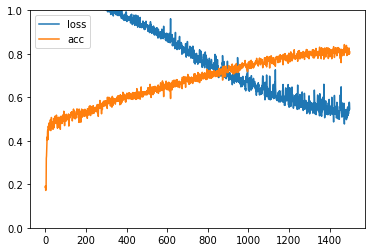

In [11]:
#Loss Accuracy
historydf=pd.DataFrame(history.history,index=history.epoch)
historydf.plot(ylim=(0,1))

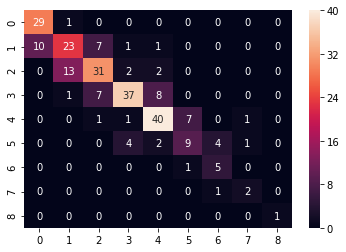

In [12]:
#confusion matrix
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(y_test_class, y_pred_class))
sn.heatmap(df_cm, annot=True)

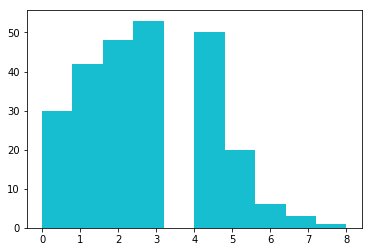

In [13]:
i=0
cm2=pd.DataFrame()
for j in range(len(plt.hist(y_test_class)[0])):
       if plt.hist(y_test_class)[0][j]>0:
            cm2[i]=cm[i]/plt.hist(y_test_class)[0][j]
            i=i+1

cm_final=np.round(np.transpose(cm2),2)

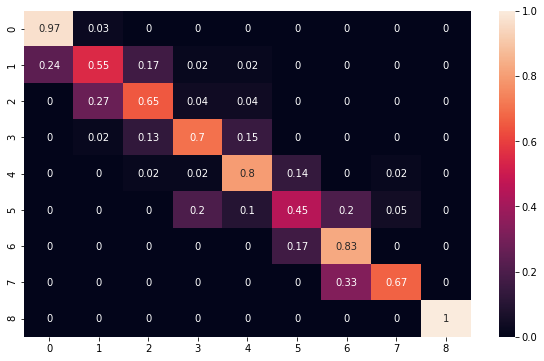

In [14]:
plt.subplots(figsize=(10,6))
sns.heatmap(cm_final, annot=True)

In [15]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

clf=RandomForestClassifier(n_estimators=500,max_features=4,max_depth=1000,bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7984189723320159
